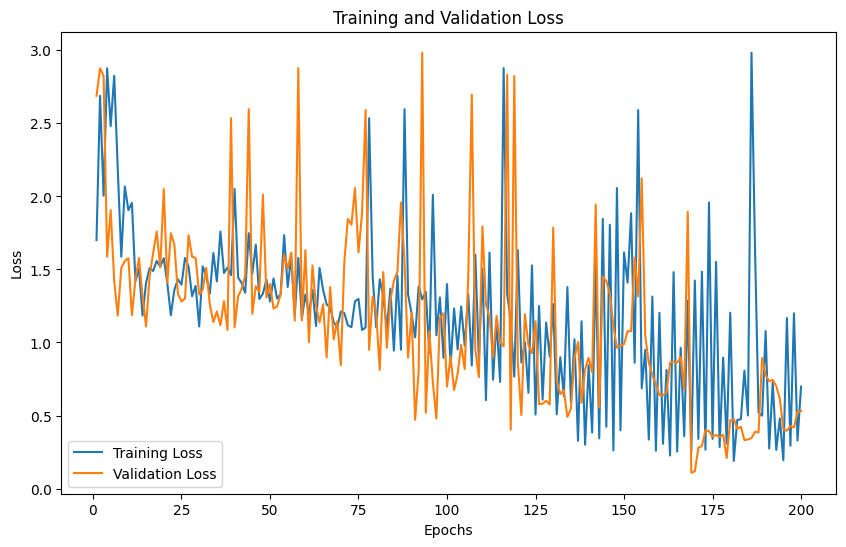

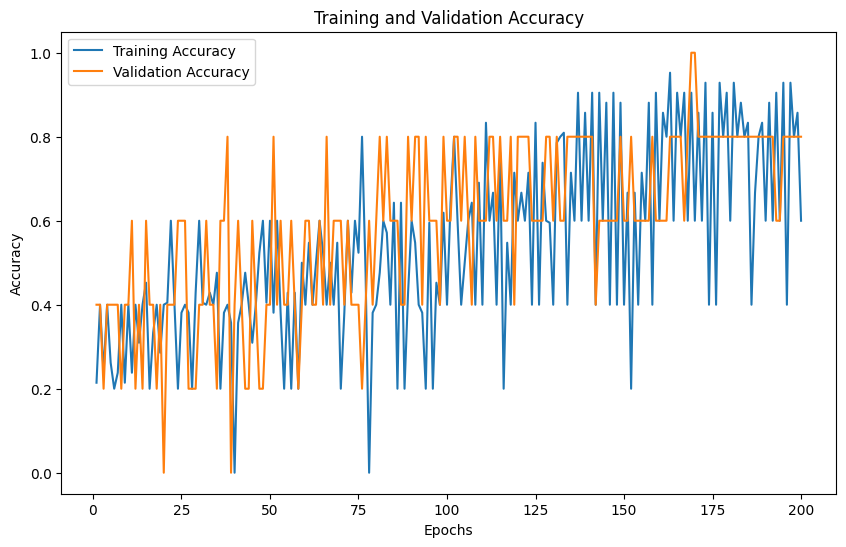

In [ ]:
import re
import matplotlib.pyplot as plt

# Extract details from the text
text = '''
Epoch 1/200
2/2 [==============================] - 15s 2s/step - loss: 1.7012 - accuracy: 0.2143 - val_loss: 2.6888 - val_accuracy: 0.4000
Epoch 2/200
2/2 [==============================] - 1s 572ms/step - loss: 2.0051 - accuracy: 0.2381 - val_loss: 2.8766 - val_accuracy: 0.4000
Epoch 3/200
2/2 [==============================] - 1s 550ms/step - loss: 2.4810 - accuracy: 0.2619 - val_loss: 2.8260 - val_accuracy: 0.2000
Epoch 4/200
2/2 [==============================] - 1s 574ms/step - loss: 2.1891 - accuracy: 0.2381 - val_loss: 1.5872 - val_accuracy: 0.4000
Epoch 5/200
2/2 [==============================] - 2s 878ms/step - loss: 2.0682 - accuracy: 0.2143 - val_loss: 1.9063 - val_accuracy: 0.4000
Epoch 6/200
2/2 [==============================] - 2s 918ms/step - loss: 1.9555 - accuracy: 0.2381 - val_loss: 1.4210 - val_accuracy: 0.4000
Epoch 7/200
2/2 [==============================] - 2s 624ms/step - loss: 1.5031 - accuracy: 0.3095 - val_loss: 1.1846 - val_accuracy: 0.4000
Epoch 8/200
2/2 [==============================] - 1s 537ms/step - loss: 1.4089 - accuracy: 0.4524 - val_loss: 1.5095 - val_accuracy: 0.2000
Epoch 9/200
2/2 [==============================] - 1s 538ms/step - loss: 1.4898 - accuracy: 0.3333 - val_loss: 1.5586 - val_accuracy: 0.4000
Epoch 10/200
2/2 [==============================] - 1s 547ms/step - loss: 1.5191 - accuracy: 0.2857 - val_loss: 1.5769 - val_accuracy: 0.4000
Epoch 11/200
2/2 [==============================] - 1s 547ms/step - loss: 1.4050 - accuracy: 0.4048 - val_loss: 1.1866 - val_accuracy: 0.6000
Epoch 12/200
2/2 [==============================] - 1s 564ms/step - loss: 1.3612 - accuracy: 0.4048 - val_loss: 1.4323 - val_accuracy: 0.2000
Epoch 13/200
2/2 [==============================] - 1s 558ms/step - loss: 1.3959 - accuracy: 0.3810 - val_loss: 1.5786 - val_accuracy: 0.4000
Epoch 14/200
2/2 [==============================] - 2s 768ms/step - loss: 1.5188 - accuracy: 0.3810 - val_loss: 1.3167 - val_accuracy: 0.2000
Epoch 15/200
2/2 [==============================] - 2s 929ms/step - loss: 1.3876 - accuracy: 0.4286 - val_loss: 1.1096 - val_accuracy: 0.6000
Epoch 16/200
2/2 [==============================] - 2s 552ms/step - loss: 1.5216 - accuracy: 0.4048 - val_loss: 1.4545 - val_accuracy: 0.4000
Epoch 17/200
2/2 [==============================] - 1s 547ms/step - loss: 1.3333 - accuracy: 0.4286 - val_loss: 1.6121 - val_accuracy: 0.4000
Epoch 18/200
2/2 [==============================] - 2s 959ms/step - loss: 1.4180 - accuracy: 0.4762 - val_loss: 1.7597 - val_accuracy: 0.2000
Epoch 19/200
2/2 [==============================] - 2s 981ms/step - loss: 1.4756 - accuracy: 0.3810 - val_loss: 1.5143 - val_accuracy: 0.4000
Epoch 20/200
2/2 [==============================] - 1s 565ms/step - loss: 1.4601 - accuracy: 0.3571 - val_loss: 2.0508 - val_accuracy: 0.0000e+00
Epoch 21/200
2/2 [==============================] - 1s 541ms/step - loss: 1.4441 - accuracy: 0.3571 - val_loss: 1.4081 - val_accuracy: 0.4000
Epoch 22/200
2/2 [==============================] - 2s 893ms/step - loss: 1.3406 - accuracy: 0.4762 - val_loss: 1.7480 - val_accuracy: 0.4000
Epoch 23/200
2/2 [==============================] - 2s 875ms/step - loss: 1.4689 - accuracy: 0.3095 - val_loss: 1.6698 - val_accuracy: 0.4000
Epoch 24/200
2/2 [==============================] - 2s 537ms/step - loss: 1.2977 - accuracy: 0.5238 - val_loss: 1.3339 - val_accuracy: 0.6000
Epoch 25/200
2/2 [==============================] - 1s 552ms/step - loss: 1.4311 - accuracy: 0.4048 - val_loss: 1.2807 - val_accuracy: 0.6000
Epoch 26/200
2/2 [==============================] - 1s 561ms/step - loss: 1.4379 - accuracy: 0.3810 - val_loss: 1.3009 - val_accuracy: 0.6000
Epoch 27/200
2/2 [==============================] - 1s 553ms/step - loss: 1.3298 - accuracy: 0.3810 - val_loss: 1.7344 - val_accuracy: 0.2000
Epoch 28/200
2/2 [==============================] - 1s 595ms/step - loss: 1.3796 - accuracy: 0.4286 - val_loss: 1.5868 - val_accuracy: 0.2000
Epoch 29/200
2/2 [==============================] - 1s 542ms/step - loss: 1.1855 - accuracy: 0.4286 - val_loss: 1.5789 - val_accuracy: 0.2000
Epoch 30/200
2/2 [==============================] - 1s 573ms/step - loss: 1.1652 - accuracy: 0.5000 - val_loss: 1.3288 - val_accuracy: 0.4000
Epoch 31/200
2/2 [==============================] - 1s 614ms/step - loss: 1.1950 - accuracy: 0.5476 - val_loss: 1.3619 - val_accuracy: 0.4000
Epoch 32/200
2/2 [==============================] - 2s 890ms/step - loss: 1.1128 - accuracy: 0.5000 - val_loss: 1.5109 - val_accuracy: 0.6000
Epoch 33/200
2/2 [==============================] - 2s 714ms/step - loss: 1.3600 - accuracy: 0.5238 - val_loss: 1.2611 - val_accuracy: 0.4000
Epoch 34/200
2/2 [==============================] - 1s 557ms/step - loss: 1.2382 - accuracy: 0.5000 - val_loss: 1.1395 - val_accuracy: 0.4000
Epoch 35/200
2/2 [==============================] - 1s 564ms/step - loss: 1.1018 - accuracy: 0.5476 - val_loss: 1.2119 - val_accuracy: 0.2000
Epoch 36/200
2/2 [==============================] - 1s 531ms/step - loss: 1.2018 - accuracy: 0.3810 - val_loss: 1.1172 - val_accuracy: 0.6000
Epoch 37/200
2/2 [==============================] - 1s 544ms/step - loss: 1.1051 - accuracy: 0.4286 - val_loss: 1.2826 - val_accuracy: 0.6000
Epoch 38/200
2/2 [==============================] - 1s 560ms/step - loss: 1.2980 - accuracy: 0.5238 - val_loss: 1.0855 - val_accuracy: 0.8000
Epoch 39/200
2/2 [==============================] - 1s 555ms/step - loss: 1.1030 - accuracy: 0.4762 - val_loss: 2.5354 - val_accuracy: 0.0000e+00
Epoch 40/200
2/2 [==============================] - 1s 588ms/step - loss: 1.4515 - accuracy: 0.3810 - val_loss: 1.1036 - val_accuracy: 0.4000
Epoch 41/200
2/2 [==============================] - 2s 920ms/step - loss: 1.4323 - accuracy: 0.4762 - val_loss: 1.3160 - val_accuracy: 0.6000
Epoch 42/200
2/2 [==============================] - 2s 846ms/step - loss: 1.0920 - accuracy: 0.5714 - val_loss: 1.3678 - val_accuracy: 0.4000
Epoch 43/200
2/2 [==============================] - 1s 538ms/step - loss: 0.9446 - accuracy: 0.6429 - val_loss: 1.4574 - val_accuracy: 0.2000
Epoch 44/200
2/2 [==============================] - 1s 564ms/step - loss: 0.9500 - accuracy: 0.6429 - val_loss: 2.5976 - val_accuracy: 0.2000
Epoch 45/200
2/2 [==============================] - 1s 562ms/step - loss: 1.3288 - accuracy: 0.4286 - val_loss: 1.1967 - val_accuracy: 0.6000
Epoch 46/200
2/2 [==============================] - 1s 549ms/step - loss: 1.0349 - accuracy: 0.5476 - val_loss: 1.3853 - val_accuracy: 0.4000
Epoch 47/200
2/2 [==============================] - 1s 546ms/step - loss: 1.2958 - accuracy: 0.3810 - val_loss: 1.3465 - val_accuracy: 0.2000
Epoch 48/200
2/2 [==============================] - 1s 579ms/step - loss: 0.9283 - accuracy: 0.5952 - val_loss: 2.0110 - val_accuracy: 0.2000
Epoch 49/200
2/2 [==============================] - 1s 572ms/step - loss: 1.0492 - accuracy: 0.4524 - val_loss: 1.3082 - val_accuracy: 0.4000
Epoch 50/200
2/2 [==============================] - 2s 974ms/step - loss: 0.8950 - accuracy: 0.6190 - val_loss: 1.3996 - val_accuracy: 0.4000
Epoch 51/200
2/2 [==============================] - 2s 977ms/step - loss: 0.8366 - accuracy: 0.6429 - val_loss: 1.2324 - val_accuracy: 0.8000
Epoch 52/200
2/2 [==============================] - 1s 554ms/step - loss: 0.9527 - accuracy: 0.5952 - val_loss: 1.2466 - val_accuracy: 0.4000
Epoch 53/200
2/2 [==============================] - 1s 561ms/step - loss: 0.9787 - accuracy: 0.5000 - val_loss: 1.3305 - val_accuracy: 0.6000
Epoch 54/200
2/2 [==============================] - 1s 559ms/step - loss: 0.8431 - accuracy: 0.6429 - val_loss: 1.6007 - val_accuracy: 0.4000
Epoch 55/200
2/2 [==============================] - 1s 621ms/step - loss: 0.8805 - accuracy: 0.6905 - val_loss: 1.5053 - val_accuracy: 0.4000
Epoch 56/200
2/2 [==============================] - 1s 577ms/step - loss: 0.6046 - accuracy: 0.8333 - val_loss: 1.6154 - val_accuracy: 0.6000
Epoch 57/200
2/2 [==============================] - 1s 544ms/step - loss: 0.7450 - accuracy: 0.6667 - val_loss: 1.1497 - val_accuracy: 0.4000
Epoch 58/200
2/2 [==============================] - 1s 553ms/step - loss: 0.7303 - accuracy: 0.7619 - val_loss: 2.8784 - val_accuracy: 0.2000
Epoch 59/200
2/2 [==============================] - 2s 972ms/step - loss: 1.3311 - accuracy: 0.5476 - val_loss: 1.1511 - val_accuracy: 0.4000
Epoch 60/200
2/2 [==============================] - 2s 930ms/step - loss: 0.7667 - accuracy: 0.7143 - val_loss: 1.6319 - val_accuracy: 0.6000
Epoch 61/200
2/2 [==============================] - 1s 551ms/step - loss: 0.8629 - accuracy: 0.6667 - val_loss: 1.0021 - val_accuracy: 0.6000
Epoch 62/200
2/2 [==============================] - 1s 622ms/step - loss: 0.6559 - accuracy: 0.7143 - val_loss: 1.5277 - val_accuracy: 0.4000
Epoch 63/200
2/2 [==============================] - 1s 558ms/step - loss: 0.5062 - accuracy: 0.8333 - val_loss: 1.2497 - val_accuracy: 0.4000
Epoch 64/200
2/2 [==============================] - 1s 553ms/step - loss: 0.6085 - accuracy: 0.7381 - val_loss: 1.1367 - val_accuracy: 0.6000
Epoch 65/200
2/2 [==============================] - 1s 553ms/step - loss: 0.9039 - accuracy: 0.5952 - val_loss: 1.2629 - val_accuracy: 0.4000
Epoch 66/200
2/2 [==============================] - 1s 566ms/step - loss: 0.5083 - accuracy: 0.7857 - val_loss: 0.8987 - val_accuracy: 0.8000
Epoch 67/200
2/2 [==============================] - 1s 567ms/step - loss: 0.6331 - accuracy: 0.8095 - val_loss: 1.3796 - val_accuracy: 0.4000
Epoch 68/200
2/2 [==============================] - 2s 947ms/step - loss: 0.5909 - accuracy: 0.7143 - val_loss: 1.0219 - val_accuracy: 0.6000
Epoch 69/200
2/2 [==============================] - 2s 976ms/step - loss: 0.3268 - accuracy: 0.9048 - val_loss: 1.1455 - val_accuracy: 0.6000
Epoch 70/200
2/2 [==============================] - 2s 580ms/step - loss: 0.2997 - accuracy: 0.8571 - val_loss: 0.8445 - val_accuracy: 0.6000
Epoch 71/200
2/2 [==============================] - 1s 569ms/step - loss: 0.3836 - accuracy: 0.9048 - val_loss: 1.5537 - val_accuracy: 0.4000
Epoch 72/200
2/2 [==============================] - 1s 548ms/step - loss: 0.3434 - accuracy: 0.9048 - val_loss: 1.8461 - val_accuracy: 0.6000
Epoch 73/200
2/2 [==============================] - 1s 561ms/step - loss: 0.4228 - accuracy: 0.8810 - val_loss: 1.8064 - val_accuracy: 0.4000
Epoch 74/200
2/2 [==============================] - 1s 546ms/step - loss: 0.2612 - accuracy: 0.9048 - val_loss: 2.0575 - val_accuracy: 0.4000
Epoch 75/200
2/2 [==============================] - 1s 628ms/step - loss: 0.3987 - accuracy: 0.8810 - val_loss: 1.6167 - val_accuracy: 0.4000
Epoch 76/200
2/2 [==============================] - 1s 570ms/step - loss: 1.4093 - accuracy: 0.6667 - val_loss: 1.8848 - val_accuracy: 0.2000
Epoch 77/200
2/2 [==============================] - 2s 961ms/step - loss: 0.8609 - accuracy: 0.6667 - val_loss: 2.5916 - val_accuracy: 0.4000
Epoch 78/200
2/2 [==============================] - 2s 902ms/step - loss: 0.6859 - accuracy: 0.7143 - val_loss: 0.9497 - val_accuracy: 0.6000
Epoch 79/200
2/2 [==============================] - 2s 563ms/step - loss: 0.3354 - accuracy: 0.8810 - val_loss: 1.3147 - val_accuracy: 0.4000
Epoch 80/200
2/2 [==============================] - 1s 559ms/step - loss: 0.2590 - accuracy: 0.9048 - val_loss: 1.2026 - val_accuracy: 0.6000
Epoch 81/200
2/2 [==============================] - 1s 572ms/step - loss: 0.3062 - accuracy: 0.8571 - val_loss: 0.8120 - val_accuracy: 0.8000
Epoch 82/200
2/2 [==============================] - 1s 519ms/step - loss: 0.2262 - accuracy: 0.9524 - val_loss: 1.4815 - val_accuracy: 0.6000
Epoch 83/200
2/2 [==============================] - 1s 568ms/step - loss: 0.2534 - accuracy: 0.9048 - val_loss: 0.9637 - val_accuracy: 0.8000
Epoch 84/200
2/2 [==============================] - 1s 558ms/step - loss: 0.3578 - accuracy: 0.9048 - val_loss: 1.2870 - val_accuracy: 0.6000
Epoch 85/200
2/2 [==============================] - 1s 556ms/step - loss: 0.2497 - accuracy: 0.9048 - val_loss: 1.4242 - val_accuracy: 0.6000
Epoch 86/200
2/2 [==============================] - 2s 960ms/step - loss: 0.3398 - accuracy: 0.8571 - val_loss: 1.4847 - val_accuracy: 0.6000
Epoch 87/200
2/2 [==============================] - 2s 958ms/step - loss: 0.2664 - accuracy: 0.9286 - val_loss: 1.9587 - val_accuracy: 0.4000
Epoch 88/200
2/2 [==============================] - 2s 548ms/step - loss: 0.3403 - accuracy: 0.8571 - val_loss: 1.5520 - val_accuracy: 0.4000
Epoch 89/200
2/2 [==============================] - 1s 546ms/step - loss: 0.2846 - accuracy: 0.9286 - val_loss: 0.8967 - val_accuracy: 0.8000
Epoch 90/200
2/2 [==============================] - 1s 577ms/step - loss: 0.3077 - accuracy: 0.9048 - val_loss: 1.2042 - val_accuracy: 0.6000
Epoch 91/200
2/2 [==============================] - 1s 547ms/step - loss: 0.1892 - accuracy: 0.9286 - val_loss: 0.4705 - val_accuracy: 0.8000
Epoch 92/200
2/2 [==============================] - 1s 562ms/step - loss: 0.4745 - accuracy: 0.8810 - val_loss: 0.8075 - val_accuracy: 0.8000
Epoch 93/200
2/2 [==============================] - 1s 578ms/step - loss: 0.5001 - accuracy: 0.8333 - val_loss: 2.9837 - val_accuracy: 0.4000
Epoch 94/200
2/2 [==============================] - 1s 546ms/step - loss: 1.6353 - accuracy: 0.6667 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 95/200
2/2 [==============================] - 2s 988ms/step - loss: 0.4990 - accuracy: 0.8333 - val_loss: 1.0781 - val_accuracy: 0.6000
Epoch 96/200
2/2 [==============================] - 2s 946ms/step - loss: 0.2744 - accuracy: 0.8810 - val_loss: 0.7260 - val_accuracy: 0.6000
Epoch 97/200
2/2 [==============================] - 2s 557ms/step - loss: 0.2650 - accuracy: 0.9048 - val_loss: 0.4795 - val_accuracy: 0.6000
Epoch 98/200
2/2 [==============================] - 1s 537ms/step - loss: 0.1941 - accuracy: 0.9286 - val_loss: 1.1682 - val_accuracy: 0.4000
Epoch 99/200
2/2 [==============================] - 1s 546ms/step - loss: 0.2937 - accuracy: 0.9286 - val_loss: 1.1996 - val_accuracy: 0.8000
Epoch 100/200
2/2 [==============================] - 1s 557ms/step - loss: 0.3288 - accuracy: 0.8571 - val_loss: 0.6978 - val_accuracy: 0.6000
Epoch 101/200
2/2 [==============================] - 1s 558ms/step - loss: 0.1835 - accuracy: 0.9286 - val_loss: 0.9062 - val_accuracy: 0.6000
Epoch 102/200
2/2 [==============================] - 1s 555ms/step - loss: 0.2386 - accuracy: 0.9048 - val_loss: 0.6744 - val_accuracy: 0.8000
Epoch 103/200
2/2 [==============================] - 1s 578ms/step - loss: 0.2751 - accuracy: 0.9286 - val_loss: 0.7844 - val_accuracy: 0.8000
Epoch 104/200
2/2 [==============================] - 2s 858ms/step - loss: 0.1984 - accuracy: 0.9524 - val_loss: 0.9841 - val_accuracy: 0.6000
Epoch 105/200
2/2 [==============================] - 2s 937ms/step - loss: 0.1051 - accuracy: 0.9524 - val_loss: 0.8181 - val_accuracy: 0.8000
Epoch 106/200
2/2 [==============================] - 2s 562ms/step - loss: 0.1827 - accuracy: 0.9524 - val_loss: 1.4527 - val_accuracy: 0.6000
Epoch 107/200
2/2 [==============================] - 1s 588ms/step - loss: 0.1739 - accuracy: 0.9524 - val_loss: 2.6960 - val_accuracy: 0.4000
Epoch 108/200
2/2 [==============================] - 1s 555ms/step - loss: 0.2428 - accuracy: 0.9524 - val_loss: 0.9506 - val_accuracy: 0.8000
Epoch 109/200
2/2 [==============================] - 1s 564ms/step - loss: 0.1738 - accuracy: 0.9524 - val_loss: 0.7626 - val_accuracy: 0.6000
Epoch 110/200
2/2 [==============================] - 1s 556ms/step - loss: 0.1275 - accuracy: 0.9286 - val_loss: 1.7943 - val_accuracy: 0.6000
Epoch 111/200
2/2 [==============================] - 1s 535ms/step - loss: 0.1891 - accuracy: 0.9524 - val_loss: 1.2596 - val_accuracy: 0.6000
Epoch 112/200
2/2 [==============================] - 1s 525ms/step - loss: 0.1665 - accuracy: 0.9048 - val_loss: 1.1733 - val_accuracy: 0.8000
Epoch 113/200
2/2 [==============================] - 2s 2s/step - loss: 0.3650 - accuracy: 0.9048 - val_loss: 0.8964 - val_accuracy: 0.8000
Epoch 114/200
2/2 [==============================] - 2s 999ms/step - loss: 0.1563 - accuracy: 0.9286 - val_loss: 1.1817 - val_accuracy: 0.6000
Epoch 115/200
2/2 [==============================] - 2s 620ms/step - loss: 0.1383 - accuracy: 0.9762 - val_loss: 1.0034 - val_accuracy: 0.8000
Epoch 116/200
2/2 [==============================] - 1s 581ms/step - loss: 0.0887 - accuracy: 0.9762 - val_loss: 0.9731 - val_accuracy: 0.6000
Epoch 117/200
2/2 [==============================] - 1s 571ms/step - loss: 0.1125 - accuracy: 0.9524 - val_loss: 2.8341 - val_accuracy: 0.6000
Epoch 118/200
2/2 [==============================] - 1s 577ms/step - loss: 0.1329 - accuracy: 0.9524 - val_loss: 0.4037 - val_accuracy: 0.8000
Epoch 119/200
2/2 [==============================] - 1s 567ms/step - loss: 0.2808 - accuracy: 0.8810 - val_loss: 2.8236 - val_accuracy: 0.4000
Epoch 120/200
2/2 [==============================] - 1s 546ms/step - loss: 0.2732 - accuracy: 0.8810 - val_loss: 0.8661 - val_accuracy: 0.8000
Epoch 121/200
2/2 [==============================] - 1s 556ms/step - loss: 0.1313 - accuracy: 0.9524 - val_loss: 0.5031 - val_accuracy: 0.8000
Epoch 122/200
2/2 [==============================] - 2s 886ms/step - loss: 0.2539 - accuracy: 0.9286 - val_loss: 1.1940 - val_accuracy: 0.8000
Epoch 123/200
2/2 [==============================] - 2s 908ms/step - loss: 1.0325 - accuracy: 0.7619 - val_loss: 0.9803 - val_accuracy: 0.8000
Epoch 124/200
2/2 [==============================] - 2s 566ms/step - loss: 0.1320 - accuracy: 0.9524 - val_loss: 0.9262 - val_accuracy: 0.6000
Epoch 125/200
2/2 [==============================] - 1s 586ms/step - loss: 0.1220 - accuracy: 0.9762 - val_loss: 1.1453 - val_accuracy: 0.6000
Epoch 126/200
2/2 [==============================] - 1s 566ms/step - loss: 0.0523 - accuracy: 0.9762 - val_loss: 0.5787 - val_accuracy: 0.6000
Epoch 127/200
2/2 [==============================] - 1s 543ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.5810 - val_accuracy: 0.6000
Epoch 128/200
2/2 [==============================] - 1s 565ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.6008 - val_accuracy: 0.8000
Epoch 129/200
2/2 [==============================] - 1s 574ms/step - loss: 0.0272 - accuracy: 1.0000 - val_loss: 0.5752 - val_accuracy: 0.8000
Epoch 130/200
2/2 [==============================] - 1s 571ms/step - loss: 0.0337 - accuracy: 0.9762 - val_loss: 1.7861 - val_accuracy: 0.6000
Epoch 131/200
2/2 [==============================] - 2s 770ms/step - loss: 0.0687 - accuracy: 0.9762 - val_loss: 0.7415 - val_accuracy: 0.8000
Epoch 132/200
2/2 [==============================] - 2s 981ms/step - loss: 0.1333 - accuracy: 0.9524 - val_loss: 0.6461 - val_accuracy: 0.6000
Epoch 133/200
2/2 [==============================] - 2s 569ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.6738 - val_accuracy: 0.6000
Epoch 134/200
2/2 [==============================] - 1s 546ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.4903 - val_accuracy: 0.8000
Epoch 135/200
2/2 [==============================] - 1s 526ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.5475 - val_accuracy: 0.8000
Epoch 136/200
2/2 [==============================] - 1s 544ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 0.8932 - val_accuracy: 0.8000
Epoch 137/200
2/2 [==============================] - 1s 561ms/step - loss: 0.0861 - accuracy: 0.9762 - val_loss: 1.0027 - val_accuracy: 0.8000
Epoch 138/200
2/2 [==============================] - 1s 574ms/step - loss: 0.4081 - accuracy: 0.8810 - val_loss: 0.5873 - val_accuracy: 0.8000
Epoch 139/200
2/2 [==============================] - 1s 631ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.8155 - val_accuracy: 0.8000
Epoch 140/200
2/2 [==============================] - 2s 707ms/step - loss: 0.0429 - accuracy: 0.9762 - val_loss: 0.8957 - val_accuracy: 0.8000
Epoch 141/200
2/2 [==============================] - 2s 979ms/step - loss: 0.0339 - accuracy: 0.9762 - val_loss: 0.7955 - val_accuracy: 0.8000
Epoch 142/200
2/2 [==============================] - 2s 596ms/step - loss: 0.1278 - accuracy: 0.9524 - val_loss: 1.9435 - val_accuracy: 0.4000
Epoch 143/200
2/2 [==============================] - 1s 573ms/step - loss: 0.1147 - accuracy: 0.9762 - val_loss: 0.5548 - val_accuracy: 0.6000
Epoch 144/200
2/2 [==============================] - 1s 540ms/step - loss: 0.0573 - accuracy: 0.9762 - val_loss: 1.4518 - val_accuracy: 0.6000
Epoch 145/200
2/2 [==============================] - 1s 566ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.4197 - val_accuracy: 0.6000
Epoch 146/200
2/2 [==============================] - 1s 564ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.3327 - val_accuracy: 0.6000
Epoch 147/200
2/2 [==============================] - 1s 538ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.1107 - val_accuracy: 0.6000
Epoch 148/200
2/2 [==============================] - 1s 547ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.9641 - val_accuracy: 0.6000
Epoch 149/200
2/2 [==============================] - 1s 644ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.9781 - val_accuracy: 0.8000
Epoch 150/200
2/2 [==============================] - 2s 988ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.9880 - val_accuracy: 0.6000
Epoch 151/200
2/2 [==============================] - 2s 652ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.0774 - val_accuracy: 0.6000
Epoch 152/200
2/2 [==============================] - 1s 541ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.0769 - val_accuracy: 0.8000
Epoch 153/200
2/2 [==============================] - 1s 536ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.5820 - val_accuracy: 0.6000
Epoch 154/200
2/2 [==============================] - 1s 567ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 1.3159 - val_accuracy: 0.6000
Epoch 155/200
2/2 [==============================] - 1s 568ms/step - loss: 0.0342 - accuracy: 0.9762 - val_loss: 2.1242 - val_accuracy: 0.6000
Epoch 156/200
2/2 [==============================] - 1s 564ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 1.0451 - val_accuracy: 0.6000
Epoch 157/200
2/2 [==============================] - 1s 562ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.8619 - val_accuracy: 0.6000
Epoch 158/200
2/2 [==============================] - 1s 569ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7768 - val_accuracy: 0.8000
Epoch 159/200
2/2 [==============================] - 2s 955ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7164 - val_accuracy: 0.6000
Epoch 160/200
2/2 [==============================] - 2s 565ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6400 - val_accuracy: 0.6000
Epoch 161/200
2/2 [==============================] - 1s 578ms/step - loss: 3.4133e-04 - accuracy: 1.0000 - val_loss: 0.6372 - val_accuracy: 0.6000
Epoch 162/200
2/2 [==============================] - 1s 560ms/step - loss: 6.2471e-04 - accuracy: 1.0000 - val_loss: 0.6602 - val_accuracy: 0.6000
Epoch 163/200
2/2 [==============================] - 1s 568ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.8618 - val_accuracy: 0.8000
Epoch 164/200
2/2 [==============================] - 1s 543ms/step - loss: 6.6177e-04 - accuracy: 1.0000 - val_loss: 0.8700 - val_accuracy: 0.8000
Epoch 165/200
2/2 [==============================] - 1s 561ms/step - loss: 3.4718e-04 - accuracy: 1.0000 - val_loss: 0.8607 - val_accuracy: 0.8000
Epoch 166/200
2/2 [==============================] - 1s 546ms/step - loss: 5.1894e-04 - accuracy: 1.0000 - val_loss: 0.9003 - val_accuracy: 0.8000
Epoch 167/200
2/2 [==============================] - 1s 544ms/step - loss: 7.3340e-04 - accuracy: 1.0000 - val_loss: 0.6782 - val_accuracy: 0.6000
Epoch 168/200
2/2 [==============================] - 2s 957ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.8947 - val_accuracy: 0.8000
Epoch 169/200
2/2 [==============================] - 2s 769ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 1.0000
Epoch 170/200
2/2 [==============================] - 1s 565ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1176 - val_accuracy: 1.0000
Epoch 171/200
2/2 [==============================] - 1s 550ms/step - loss: 7.5022e-04 - accuracy: 1.0000 - val_loss: 0.2799 - val_accuracy: 0.8000
Epoch 172/200
2/2 [==============================] - 1s 557ms/step - loss: 3.2217e-04 - accuracy: 1.0000 - val_loss: 0.2908 - val_accuracy: 0.8000
Epoch 173/200
2/2 [==============================] - 1s 551ms/step - loss: 3.2069e-04 - accuracy: 1.0000 - val_loss: 0.4004 - val_accuracy: 0.8000
Epoch 174/200
2/2 [==============================] - 1s 552ms/step - loss: 2.7586e-04 - accuracy: 1.0000 - val_loss: 0.3926 - val_accuracy: 0.8000
Epoch 175/200
2/2 [==============================] - 1s 637ms/step - loss: 2.8161e-04 - accuracy: 1.0000 - val_loss: 0.3567 - val_accuracy: 0.8000
Epoch 176/200
2/2 [==============================] - 1s 570ms/step - loss: 3.1878e-04 - accuracy: 1.0000 - val_loss: 0.3668 - val_accuracy: 0.8000
Epoch 177/200
2/2 [==============================] - 2s 919ms/step - loss: 2.4331e-04 - accuracy: 1.0000 - val_loss: 0.3530 - val_accuracy: 0.8000
Epoch 178/200
2/2 [==============================] - 2s 941ms/step - loss: 1.3529e-04 - accuracy: 1.0000 - val_loss: 0.3688 - val_accuracy: 0.8000
Epoch 179/200
2/2 [==============================] - 1s 539ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2095 - val_accuracy: 0.8000
Epoch 180/200
2/2 [==============================] - 1s 558ms/step - loss: 6.4744e-04 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 181/200
2/2 [==============================] - 1s 563ms/step - loss: 1.0233e-04 - accuracy: 1.0000 - val_loss: 0.4753 - val_accuracy: 0.8000
Epoch 182/200
2/2 [==============================] - 1s 561ms/step - loss: 1.8405e-04 - accuracy: 1.0000 - val_loss: 0.4090 - val_accuracy: 0.8000
Epoch 183/200
2/2 [==============================] - 1s 574ms/step - loss: 1.4155e-04 - accuracy: 1.0000 - val_loss: 0.4231 - val_accuracy: 0.8000
Epoch 184/200
2/2 [==============================] - 1s 563ms/step - loss: 1.3294e-04 - accuracy: 1.0000 - val_loss: 0.3316 - val_accuracy: 0.8000
Epoch 185/200
2/2 [==============================] - 1s 540ms/step - loss: 1.5105e-04 - accuracy: 1.0000 - val_loss: 0.3364 - val_accuracy: 0.8000
Epoch 186/200
2/2 [==============================] - 2s 998ms/step - loss: 7.1926e-05 - accuracy: 1.0000 - val_loss: 0.3456 - val_accuracy: 0.8000
Epoch 187/200
2/2 [==============================] - 3s 1s/step - loss: 3.0998e-04 - accuracy: 1.0000 - val_loss: 0.3890 - val_accuracy: 0.8000
Epoch 188/200
2/2 [==============================] - 3s 1s/step - loss: 7.2300e-05 - accuracy: 1.0000 - val_loss: 0.3839 - val_accuracy: 0.8000
Epoch 189/200
2/2 [==============================] - 2s 706ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.8934 - val_accuracy: 0.8000
Epoch 190/200
2/2 [==============================] - 1s 540ms/step - loss: 2.0384e-04 - accuracy: 1.0000 - val_loss: 0.7765 - val_accuracy: 0.8000
Epoch 191/200
2/2 [==============================] - 1s 563ms/step - loss: 1.0417e-04 - accuracy: 1.0000 - val_loss: 0.7346 - val_accuracy: 0.8000
Epoch 192/200
2/2 [==============================] - 1s 592ms/step - loss: 8.2372e-05 - accuracy: 1.0000 - val_loss: 0.7441 - val_accuracy: 0.8000
Epoch 193/200
2/2 [==============================] - 1s 553ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7008 - val_accuracy: 0.6000
Epoch 194/200
2/2 [==============================] - 1s 567ms/step - loss: 2.7743e-04 - accuracy: 1.0000 - val_loss: 0.6156 - val_accuracy: 0.6000
Epoch 195/200
2/2 [==============================] - 1s 567ms/step - loss: 3.2753e-04 - accuracy: 1.0000 - val_loss: 0.4067 - val_accuracy: 0.8000
Epoch 196/200
2/2 [==============================] - 2s 984ms/step - loss: 3.4221e-04 - accuracy: 1.0000 - val_loss: 0.3961 - val_accuracy: 0.8000
Epoch 197/200
2/2 [==============================] - 2s 951ms/step - loss: 8.6800e-05 - accuracy: 1.0000 - val_loss: 0.4284 - val_accuracy: 0.8000
Epoch 198/200
2/2 [==============================] - 1s 549ms/step - loss: 2.1797e-04 - accuracy: 1.0000 - val_loss: 0.4187 - val_accuracy: 0.8000
Epoch 199/200
2/2 [==============================] - 1s 568ms/step - loss: 2.3293e-04 - accuracy: 1.0000 - val_loss: 0.5254 - val_accuracy: 0.8000
Epoch 200/200
2/2 [==============================] - 1s 536ms/step - loss: 4.3854e-05 - accuracy: 1.0000 - val_loss: 0.5303 - val_accuracy: 0.8000
'''

epochs = re.findall(r'Epoch (\d+)/\d+', text)
loss = re.findall(r'loss: ([\d.]+)', text)[:200]
accuracy = re.findall(r'accuracy: ([\d.]+)', text)[:200]
val_loss = re.findall(r'val_loss: ([\d.]+)', text)[:200]
val_accuracy = re.findall(r'val_accuracy: ([\d.]+)', text)[:200]

# Convert extracted details to float
loss = [float(val) for val in loss]
accuracy = [float(val) for val in accuracy]
val_loss = [float(val) for val in val_loss]
val_accuracy = [float(val) for val in val_accuracy]

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
lstmbigru = '''Epoch 1/200
2/2 [==============================] - 8s 1s/step - loss: 1.6582 - accuracy: 0.2619 - val_loss: 2.2317 - val_accuracy: 0.4000
Epoch 2/200
2/2 [==============================] - 0s 67ms/step - loss: 1.8543 - accuracy: 0.2857 - val_loss: 2.1767 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 66ms/step - loss: 2.1348 - accuracy: 0.1667 - val_loss: 1.7784 - val_accuracy: 0.0000e+00
Epoch 4/200
2/2 [==============================] - 0s 67ms/step - loss: 1.8366 - accuracy: 0.2381 - val_loss: 1.9620 - val_accuracy: 0.2000
Epoch 5/200
2/2 [==============================] - 0s 66ms/step - loss: 1.6220 - accuracy: 0.2381 - val_loss: 1.5411 - val_accuracy: 0.0000e+00
Epoch 6/200
2/2 [==============================] - 0s 66ms/step - loss: 1.6323 - accuracy: 0.0714 - val_loss: 1.6209 - val_accuracy: 0.2000
Epoch 7/200
2/2 [==============================] - 0s 65ms/step - loss: 1.5312 - accuracy: 0.4048 - val_loss: 1.2062 - val_accuracy: 0.6000
Epoch 8/200
2/2 [==============================] - 0s 67ms/step - loss: 1.5115 - accuracy: 0.3333 - val_loss: 1.1250 - val_accuracy: 0.4000
Epoch 9/200
2/2 [==============================] - 0s 84ms/step - loss: 1.4653 - accuracy: 0.3571 - val_loss: 1.3814 - val_accuracy: 0.4000
Epoch 10/200
2/2 [==============================] - 0s 68ms/step - loss: 1.5705 - accuracy: 0.4286 - val_loss: 1.3895 - val_accuracy: 0.6000
Epoch 11/200
2/2 [==============================] - 0s 77ms/step - loss: 1.4987 - accuracy: 0.3571 - val_loss: 1.3736 - val_accuracy: 0.4000
Epoch 12/200
2/2 [==============================] - 0s 67ms/step - loss: 1.4898 - accuracy: 0.3095 - val_loss: 1.1332 - val_accuracy: 0.6000
Epoch 13/200
2/2 [==============================] - 0s 76ms/step - loss: 1.3926 - accuracy: 0.4286 - val_loss: 1.1063 - val_accuracy: 0.4000
Epoch 14/200
2/2 [==============================] - 0s 72ms/step - loss: 1.4517 - accuracy: 0.2619 - val_loss: 1.0771 - val_accuracy: 0.6000
Epoch 15/200
2/2 [==============================] - 0s 66ms/step - loss: 1.4520 - accuracy: 0.3810 - val_loss: 1.1497 - val_accuracy: 0.6000
Epoch 16/200
2/2 [==============================] - 0s 65ms/step - loss: 1.4707 - accuracy: 0.3095 - val_loss: 1.4717 - val_accuracy: 0.2000
Epoch 17/200
2/2 [==============================] - 0s 95ms/step - loss: 1.4272 - accuracy: 0.2143 - val_loss: 1.2415 - val_accuracy: 0.6000
Epoch 18/200
2/2 [==============================] - 0s 63ms/step - loss: 1.4736 - accuracy: 0.3810 - val_loss: 1.1249 - val_accuracy: 0.4000
Epoch 19/200
2/2 [==============================] - 0s 62ms/step - loss: 1.4463 - accuracy: 0.2381 - val_loss: 1.3770 - val_accuracy: 0.2000
Epoch 20/200
2/2 [==============================] - 0s 81ms/step - loss: 1.4136 - accuracy: 0.3810 - val_loss: 1.0852 - val_accuracy: 0.6000
Epoch 21/200
2/2 [==============================] - 0s 75ms/step - loss: 1.5034 - accuracy: 0.3095 - val_loss: 1.1304 - val_accuracy: 0.4000
Epoch 22/200
2/2 [==============================] - 0s 66ms/step - loss: 1.3815 - accuracy: 0.3810 - val_loss: 1.1077 - val_accuracy: 0.6000
Epoch 23/200
2/2 [==============================] - 0s 67ms/step - loss: 1.2577 - accuracy: 0.4048 - val_loss: 1.1566 - val_accuracy: 0.6000
Epoch 24/200
2/2 [==============================] - 0s 78ms/step - loss: 1.3299 - accuracy: 0.3810 - val_loss: 1.2992 - val_accuracy: 0.4000
Epoch 25/200
2/2 [==============================] - 0s 94ms/step - loss: 1.2796 - accuracy: 0.3810 - val_loss: 0.8810 - val_accuracy: 0.6000
Epoch 26/200
2/2 [==============================] - 0s 62ms/step - loss: 1.4338 - accuracy: 0.3810 - val_loss: 1.1688 - val_accuracy: 0.4000
Epoch 27/200
2/2 [==============================] - 0s 87ms/step - loss: 1.3004 - accuracy: 0.4524 - val_loss: 1.3236 - val_accuracy: 0.4000
Epoch 28/200
2/2 [==============================] - 0s 66ms/step - loss: 1.3991 - accuracy: 0.2381 - val_loss: 1.4016 - val_accuracy: 0.4000
Epoch 29/200
2/2 [==============================] - 0s 68ms/step - loss: 1.2979 - accuracy: 0.3333 - val_loss: 1.0433 - val_accuracy: 0.6000
Epoch 30/200
2/2 [==============================] - 0s 80ms/step - loss: 1.1614 - accuracy: 0.4762 - val_loss: 1.0708 - val_accuracy: 0.6000
Epoch 31/200
2/2 [==============================] - 0s 80ms/step - loss: 1.2653 - accuracy: 0.3571 - val_loss: 1.1173 - val_accuracy: 0.6000
Epoch 32/200
2/2 [==============================] - 0s 76ms/step - loss: 1.0312 - accuracy: 0.5238 - val_loss: 1.2688 - val_accuracy: 0.4000
Epoch 33/200
2/2 [==============================] - 0s 62ms/step - loss: 1.3222 - accuracy: 0.3571 - val_loss: 1.2671 - val_accuracy: 0.4000
Epoch 34/200
2/2 [==============================] - 0s 66ms/step - loss: 1.2807 - accuracy: 0.4524 - val_loss: 1.6075 - val_accuracy: 0.4000
Epoch 35/200
2/2 [==============================] - 0s 49ms/step - loss: 1.2804 - accuracy: 0.4286 - val_loss: 1.3225 - val_accuracy: 0.4000
Epoch 36/200
2/2 [==============================] - 0s 64ms/step - loss: 1.0405 - accuracy: 0.5714 - val_loss: 1.2596 - val_accuracy: 0.2000
Epoch 37/200
2/2 [==============================] - 0s 63ms/step - loss: 1.0955 - accuracy: 0.5476 - val_loss: 1.2525 - val_accuracy: 0.4000
Epoch 38/200
2/2 [==============================] - 0s 63ms/step - loss: 1.1089 - accuracy: 0.5714 - val_loss: 1.1850 - val_accuracy: 0.4000
Epoch 39/200
2/2 [==============================] - 0s 50ms/step - loss: 0.9877 - accuracy: 0.5476 - val_loss: 1.2769 - val_accuracy: 0.2000
Epoch 40/200
2/2 [==============================] - 0s 50ms/step - loss: 0.9227 - accuracy: 0.5952 - val_loss: 1.0517 - val_accuracy: 0.4000
Epoch 41/200
2/2 [==============================] - 0s 50ms/step - loss: 1.0018 - accuracy: 0.5238 - val_loss: 1.6803 - val_accuracy: 0.4000
Epoch 42/200
2/2 [==============================] - 0s 50ms/step - loss: 1.2791 - accuracy: 0.4286 - val_loss: 1.8594 - val_accuracy: 0.4000
Epoch 43/200
2/2 [==============================] - 0s 51ms/step - loss: 1.2712 - accuracy: 0.4762 - val_loss: 1.3429 - val_accuracy: 0.4000
Epoch 44/200
2/2 [==============================] - 0s 52ms/step - loss: 0.9590 - accuracy: 0.5476 - val_loss: 1.4385 - val_accuracy: 0.4000
Epoch 45/200
2/2 [==============================] - 0s 50ms/step - loss: 0.9074 - accuracy: 0.5952 - val_loss: 1.1997 - val_accuracy: 0.4000
Epoch 46/200
2/2 [==============================] - 0s 50ms/step - loss: 0.8171 - accuracy: 0.6190 - val_loss: 1.0617 - val_accuracy: 0.6000
Epoch 47/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8609 - accuracy: 0.6429 - val_loss: 1.1925 - val_accuracy: 0.6000
Epoch 48/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8883 - accuracy: 0.4762 - val_loss: 0.9121 - val_accuracy: 0.4000
Epoch 49/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8707 - accuracy: 0.5476 - val_loss: 1.5434 - val_accuracy: 0.2000
Epoch 50/200
2/2 [==============================] - 0s 62ms/step - loss: 1.0468 - accuracy: 0.4762 - val_loss: 1.6576 - val_accuracy: 0.6000
Epoch 51/200
2/2 [==============================] - 0s 61ms/step - loss: 0.8311 - accuracy: 0.5952 - val_loss: 1.0859 - val_accuracy: 0.4000
Epoch 52/200
2/2 [==============================] - 0s 50ms/step - loss: 0.6813 - accuracy: 0.7143 - val_loss: 0.9835 - val_accuracy: 0.2000
Epoch 53/200
2/2 [==============================] - 0s 66ms/step - loss: 0.6076 - accuracy: 0.7381 - val_loss: 1.0184 - val_accuracy: 0.4000
Epoch 54/200
2/2 [==============================] - 0s 48ms/step - loss: 0.7744 - accuracy: 0.6429 - val_loss: 1.5814 - val_accuracy: 0.4000
Epoch 55/200
2/2 [==============================] - 0s 63ms/step - loss: 0.9582 - accuracy: 0.6667 - val_loss: 1.1607 - val_accuracy: 0.2000
Epoch 56/200
2/2 [==============================] - 0s 50ms/step - loss: 0.7479 - accuracy: 0.6905 - val_loss: 1.2579 - val_accuracy: 0.4000
Epoch 57/200
2/2 [==============================] - 0s 49ms/step - loss: 1.1502 - accuracy: 0.5000 - val_loss: 1.6252 - val_accuracy: 0.6000
Epoch 58/200
2/2 [==============================] - 0s 49ms/step - loss: 0.8527 - accuracy: 0.6429 - val_loss: 1.2132 - val_accuracy: 0.6000
Epoch 59/200
2/2 [==============================] - 0s 49ms/step - loss: 0.6069 - accuracy: 0.7143 - val_loss: 0.8253 - val_accuracy: 0.8000
Epoch 60/200
2/2 [==============================] - 0s 56ms/step - loss: 0.5236 - accuracy: 0.8571 - val_loss: 1.0749 - val_accuracy: 0.8000
Epoch 61/200
2/2 [==============================] - 0s 48ms/step - loss: 0.5996 - accuracy: 0.7857 - val_loss: 1.1350 - val_accuracy: 0.8000
Epoch 62/200
2/2 [==============================] - 0s 57ms/step - loss: 0.5258 - accuracy: 0.7619 - val_loss: 0.9994 - val_accuracy: 0.2000
Epoch 63/200
2/2 [==============================] - 0s 66ms/step - loss: 0.9526 - accuracy: 0.7143 - val_loss: 2.0440 - val_accuracy: 0.4000
Epoch 64/200
2/2 [==============================] - 0s 49ms/step - loss: 0.5718 - accuracy: 0.7619 - val_loss: 1.2675 - val_accuracy: 0.6000
Epoch 65/200
2/2 [==============================] - 0s 50ms/step - loss: 0.5599 - accuracy: 0.7857 - val_loss: 0.8792 - val_accuracy: 0.6000
Epoch 66/200
2/2 [==============================] - 0s 66ms/step - loss: 0.4931 - accuracy: 0.7381 - val_loss: 0.9866 - val_accuracy: 0.6000
Epoch 67/200
2/2 [==============================] - 0s 49ms/step - loss: 0.3316 - accuracy: 0.8810 - val_loss: 1.0780 - val_accuracy: 0.4000
Epoch 68/200
2/2 [==============================] - 0s 49ms/step - loss: 0.3607 - accuracy: 0.8810 - val_loss: 1.1421 - val_accuracy: 0.2000
Epoch 69/200
2/2 [==============================] - 0s 49ms/step - loss: 0.3980 - accuracy: 0.8810 - val_loss: 0.7695 - val_accuracy: 0.8000
Epoch 70/200
2/2 [==============================] - 0s 48ms/step - loss: 0.4146 - accuracy: 0.8333 - val_loss: 1.1555 - val_accuracy: 0.8000
Epoch 71/200
2/2 [==============================] - 0s 48ms/step - loss: 0.4393 - accuracy: 0.8333 - val_loss: 0.9959 - val_accuracy: 0.8000
Epoch 72/200
2/2 [==============================] - 0s 48ms/step - loss: 0.4917 - accuracy: 0.8333 - val_loss: 0.9318 - val_accuracy: 0.8000
Epoch 73/200
2/2 [==============================] - 0s 65ms/step - loss: 0.2397 - accuracy: 0.8571 - val_loss: 1.1471 - val_accuracy: 0.6000
Epoch 74/200
2/2 [==============================] - 0s 62ms/step - loss: 0.1870 - accuracy: 0.9048 - val_loss: 1.2604 - val_accuracy: 0.8000
Epoch 75/200
2/2 [==============================] - 0s 48ms/step - loss: 0.2540 - accuracy: 0.8810 - val_loss: 1.3003 - val_accuracy: 0.4000
Epoch 76/200
2/2 [==============================] - 0s 49ms/step - loss: 0.3501 - accuracy: 0.8571 - val_loss: 1.4536 - val_accuracy: 0.8000
Epoch 77/200
2/2 [==============================] - 0s 50ms/step - loss: 0.1850 - accuracy: 0.9286 - val_loss: 2.8084 - val_accuracy: 0.4000
Epoch 78/200
2/2 [==============================] - 0s 49ms/step - loss: 0.5283 - accuracy: 0.7857 - val_loss: 1.4379 - val_accuracy: 0.8000
Epoch 79/200
2/2 [==============================] - 0s 48ms/step - loss: 0.5265 - accuracy: 0.8095 - val_loss: 2.3822 - val_accuracy: 0.4000
Epoch 80/200
2/2 [==============================] - 0s 51ms/step - loss: 0.6322 - accuracy: 0.8095 - val_loss: 2.0532 - val_accuracy: 0.2000
Epoch 81/200
2/2 [==============================] - 0s 61ms/step - loss: 0.3914 - accuracy: 0.9286 - val_loss: 1.6398 - val_accuracy: 0.8000
Epoch 82/200
2/2 [==============================] - 0s 48ms/step - loss: 0.2441 - accuracy: 0.9286 - val_loss: 2.0593 - val_accuracy: 0.4000
Epoch 83/200
2/2 [==============================] - 0s 63ms/step - loss: 0.2358 - accuracy: 0.8571 - val_loss: 0.9159 - val_accuracy: 0.8000
Epoch 84/200
2/2 [==============================] - 0s 49ms/step - loss: 0.6333 - accuracy: 0.8571 - val_loss: 1.7297 - val_accuracy: 0.8000
Epoch 85/200
2/2 [==============================] - 0s 66ms/step - loss: 0.5032 - accuracy: 0.8095 - val_loss: 2.9697 - val_accuracy: 0.2000
Epoch 86/200
2/2 [==============================] - 0s 51ms/step - loss: 0.4349 - accuracy: 0.9048 - val_loss: 1.1303 - val_accuracy: 0.4000
Epoch 87/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2448 - accuracy: 0.9048 - val_loss: 0.9792 - val_accuracy: 0.8000
Epoch 88/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2058 - accuracy: 0.9524 - val_loss: 2.1102 - val_accuracy: 0.4000
Epoch 89/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2158 - accuracy: 0.9048 - val_loss: 1.5768 - val_accuracy: 0.8000
Epoch 90/200
2/2 [==============================] - 0s 48ms/step - loss: 0.1230 - accuracy: 0.9524 - val_loss: 1.3228 - val_accuracy: 0.8000
Epoch 91/200
2/2 [==============================] - 0s 49ms/step - loss: 0.1497 - accuracy: 0.9286 - val_loss: 1.8135 - val_accuracy: 0.4000
Epoch 92/200
2/2 [==============================] - 0s 60ms/step - loss: 0.1640 - accuracy: 0.9524 - val_loss: 1.6263 - val_accuracy: 0.8000
Epoch 93/200
2/2 [==============================] - 0s 47ms/step - loss: 0.1325 - accuracy: 0.9524 - val_loss: 2.6034 - val_accuracy: 0.4000
Epoch 94/200
2/2 [==============================] - 0s 63ms/step - loss: 0.1943 - accuracy: 0.9286 - val_loss: 1.4569 - val_accuracy: 0.8000
Epoch 95/200
2/2 [==============================] - 0s 49ms/step - loss: 0.3260 - accuracy: 0.9048 - val_loss: 3.0462 - val_accuracy: 0.4000
Epoch 96/200
2/2 [==============================] - 0s 50ms/step - loss: 0.1975 - accuracy: 0.9048 - val_loss: 2.1759 - val_accuracy: 0.8000
Epoch 97/200
2/2 [==============================] - 0s 49ms/step - loss: 0.2493 - accuracy: 0.9048 - val_loss: 1.1174 - val_accuracy: 0.4000
Epoch 98/200
2/2 [==============================] - 0s 53ms/step - loss: 0.2634 - accuracy: 0.8810 - val_loss: 1.6582 - val_accuracy: 0.8000
Epoch 99/200
2/2 [==============================] - 0s 70ms/step - loss: 0.0781 - accuracy: 1.0000 - val_loss: 1.6803 - val_accuracy: 0.8000
Epoch 100/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0941 - accuracy: 0.9762 - val_loss: 1.6875 - val_accuracy: 0.8000
Epoch 101/200
2/2 [==============================] - 0s 48ms/step - loss: 0.3778 - accuracy: 0.9286 - val_loss: 1.0386 - val_accuracy: 0.8000
Epoch 102/200
2/2 [==============================] - 0s 48ms/step - loss: 0.2870 - accuracy: 0.9286 - val_loss: 2.1239 - val_accuracy: 0.8000
Epoch 103/200
2/2 [==============================] - 0s 49ms/step - loss: 0.1431 - accuracy: 0.9524 - val_loss: 2.3657 - val_accuracy: 0.8000
Epoch 104/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0652 - accuracy: 0.9762 - val_loss: 3.0145 - val_accuracy: 0.4000
Epoch 105/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1211 - accuracy: 0.9762 - val_loss: 2.3657 - val_accuracy: 0.6000
Epoch 106/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0838 - accuracy: 0.9762 - val_loss: 2.7224 - val_accuracy: 0.4000
Epoch 107/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0717 - accuracy: 0.9762 - val_loss: 2.0382 - val_accuracy: 0.8000
Epoch 108/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 2.0448 - val_accuracy: 0.8000
Epoch 109/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0746 - accuracy: 0.9762 - val_loss: 2.1631 - val_accuracy: 0.8000
Epoch 110/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 2.3749 - val_accuracy: 0.8000
Epoch 111/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 2.7961 - val_accuracy: 0.8000
Epoch 112/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0281 - accuracy: 0.9762 - val_loss: 2.6783 - val_accuracy: 0.8000
Epoch 113/200
2/2 [==============================] - 0s 54ms/step - loss: 0.4779 - accuracy: 0.8571 - val_loss: 2.5729 - val_accuracy: 0.6000
Epoch 114/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1651 - accuracy: 0.9524 - val_loss: 2.5812 - val_accuracy: 0.8000
Epoch 115/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0646 - accuracy: 0.9762 - val_loss: 2.7537 - val_accuracy: 0.8000
Epoch 116/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0748 - accuracy: 0.9762 - val_loss: 2.3743 - val_accuracy: 0.8000
Epoch 117/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0874 - accuracy: 0.9524 - val_loss: 2.5804 - val_accuracy: 0.8000
Epoch 118/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0586 - accuracy: 0.9762 - val_loss: 2.4310 - val_accuracy: 0.8000
Epoch 119/200
2/2 [==============================] - 0s 66ms/step - loss: 0.0979 - accuracy: 0.9524 - val_loss: 2.4136 - val_accuracy: 0.8000
Epoch 120/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1479 - accuracy: 0.9762 - val_loss: 2.4343 - val_accuracy: 0.8000
Epoch 121/200
2/2 [==============================] - 0s 50ms/step - loss: 0.4694 - accuracy: 0.8810 - val_loss: 3.4337 - val_accuracy: 0.8000
Epoch 122/200
2/2 [==============================] - 0s 54ms/step - loss: 0.1412 - accuracy: 0.9524 - val_loss: 1.1177 - val_accuracy: 0.6000
Epoch 123/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1195 - accuracy: 0.9762 - val_loss: 3.3036 - val_accuracy: 0.8000
Epoch 124/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 3.1707 - val_accuracy: 0.8000
Epoch 125/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0554 - accuracy: 0.9762 - val_loss: 3.3122 - val_accuracy: 0.8000
Epoch 126/200
2/2 [==============================] - 0s 64ms/step - loss: 0.1097 - accuracy: 0.9524 - val_loss: 4.2883 - val_accuracy: 0.4000
Epoch 127/200
2/2 [==============================] - 0s 51ms/step - loss: 0.1279 - accuracy: 0.9762 - val_loss: 2.9844 - val_accuracy: 0.8000
Epoch 128/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0349 - accuracy: 0.9762 - val_loss: 3.3577 - val_accuracy: 0.6000
Epoch 129/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0490 - accuracy: 0.9762 - val_loss: 3.1615 - val_accuracy: 0.8000
Epoch 130/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0619 - accuracy: 0.9762 - val_loss: 3.0742 - val_accuracy: 0.8000
Epoch 131/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0198 - accuracy: 1.0000 - val_loss: 2.9597 - val_accuracy: 0.8000
Epoch 132/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 3.0005 - val_accuracy: 0.8000
Epoch 133/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 3.1974 - val_accuracy: 0.8000
Epoch 134/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 2.8639 - val_accuracy: 0.8000
Epoch 135/200
2/2 [==============================] - 0s 72ms/step - loss: 0.0275 - accuracy: 0.9762 - val_loss: 2.6711 - val_accuracy: 0.8000
Epoch 136/200
2/2 [==============================] - 0s 66ms/step - loss: 1.7037 - accuracy: 0.6905 - val_loss: 0.4351 - val_accuracy: 1.0000
Epoch 137/200
2/2 [==============================] - 0s 49ms/step - loss: 0.2224 - accuracy: 0.9524 - val_loss: 0.9196 - val_accuracy: 0.8000
Epoch 138/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0762 - accuracy: 0.9524 - val_loss: 0.9198 - val_accuracy: 0.8000
Epoch 139/200
2/2 [==============================] - 0s 69ms/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.8739 - val_accuracy: 0.8000
Epoch 140/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.9609 - val_accuracy: 0.8000
Epoch 141/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.8856 - val_accuracy: 0.8000
Epoch 142/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0447 - accuracy: 0.9762 - val_loss: 1.0570 - val_accuracy: 0.8000
Epoch 143/200
2/2 [==============================] - 0s 64ms/step - loss: 0.1109 - accuracy: 0.9762 - val_loss: 0.7291 - val_accuracy: 0.8000
Epoch 144/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0785 - accuracy: 0.9762 - val_loss: 3.1755 - val_accuracy: 0.8000
Epoch 145/200
2/2 [==============================] - 0s 53ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.8199 - val_accuracy: 0.8000
Epoch 146/200
2/2 [==============================] - 0s 56ms/step - loss: 0.1362 - accuracy: 0.9524 - val_loss: 0.2777 - val_accuracy: 0.8000
Epoch 147/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.5323 - val_accuracy: 0.8000
Epoch 148/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.6079 - val_accuracy: 0.8000
Epoch 149/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6860 - val_accuracy: 0.8000
Epoch 150/200
2/2 [==============================] - 0s 80ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.2122 - val_accuracy: 0.8000
Epoch 151/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.2993 - val_accuracy: 0.8000
Epoch 152/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 1.3989 - val_accuracy: 0.8000
Epoch 153/200
2/2 [==============================] - 0s 80ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 1.3812 - val_accuracy: 0.8000
Epoch 154/200
2/2 [==============================] - 0s 78ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.3977 - val_accuracy: 0.8000
Epoch 155/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.4410 - val_accuracy: 0.8000
Epoch 156/200
2/2 [==============================] - 0s 88ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.4415 - val_accuracy: 0.8000
Epoch 157/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.5457 - val_accuracy: 0.8000
Epoch 158/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.5492 - val_accuracy: 0.8000
Epoch 159/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.3244 - val_accuracy: 0.8000
Epoch 160/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0647 - accuracy: 0.9524 - val_loss: 1.9263 - val_accuracy: 0.6000
Epoch 161/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 2.0500 - val_accuracy: 0.6000
Epoch 162/200
2/2 [==============================] - 0s 69ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6564 - val_accuracy: 0.8000
Epoch 163/200
2/2 [==============================] - 0s 70ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.2524 - val_accuracy: 0.8000
Epoch 164/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0595 - accuracy: 0.9762 - val_loss: 3.5075 - val_accuracy: 0.6000
Epoch 165/200
2/2 [==============================] - 0s 77ms/step - loss: 0.9293 - accuracy: 0.7619 - val_loss: 4.1101 - val_accuracy: 0.4000
Epoch 166/200
2/2 [==============================] - 0s 74ms/step - loss: 0.3610 - accuracy: 0.8810 - val_loss: 2.4406 - val_accuracy: 0.8000
Epoch 167/200
2/2 [==============================] - 0s 70ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 2.7351 - val_accuracy: 0.8000
Epoch 168/200
2/2 [==============================] - 0s 89ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 2.6674 - val_accuracy: 0.8000
Epoch 169/200
2/2 [==============================] - 0s 78ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 2.5642 - val_accuracy: 0.8000
Epoch 170/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 2.8073 - val_accuracy: 0.8000
Epoch 171/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.8060 - val_accuracy: 0.8000
Epoch 172/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0344 - accuracy: 0.9762 - val_loss: 2.4489 - val_accuracy: 0.6000
Epoch 173/200
2/2 [==============================] - 0s 76ms/step - loss: 0.1232 - accuracy: 0.9524 - val_loss: 2.2708 - val_accuracy: 0.8000
Epoch 174/200
2/2 [==============================] - 0s 68ms/step - loss: 0.0708 - accuracy: 0.9524 - val_loss: 3.8439 - val_accuracy: 0.4000
Epoch 175/200
2/2 [==============================] - 0s 74ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 2.8899 - val_accuracy: 0.8000
Epoch 176/200
2/2 [==============================] - 0s 90ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 2.6710 - val_accuracy: 0.8000
Epoch 177/200
2/2 [==============================] - 0s 79ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 2.5272 - val_accuracy: 0.8000
Epoch 178/200
2/2 [==============================] - 0s 78ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.5479 - val_accuracy: 0.8000
Epoch 179/200
2/2 [==============================] - 0s 75ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.5116 - val_accuracy: 0.8000
Epoch 180/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.5671 - val_accuracy: 0.8000
Epoch 181/200
2/2 [==============================] - 0s 64ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.2708 - val_accuracy: 0.8000
Epoch 182/200
2/2 [==============================] - 0s 66ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 2.2916 - val_accuracy: 0.8000
Epoch 183/200
2/2 [==============================] - 0s 73ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 2.3087 - val_accuracy: 0.8000
Epoch 184/200
2/2 [==============================] - 0s 83ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.2997 - val_accuracy: 0.8000
Epoch 185/200
2/2 [==============================] - 0s 82ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.9994 - val_accuracy: 0.8000
Epoch 186/200
2/2 [==============================] - 0s 91ms/step - loss: 6.2042e-04 - accuracy: 1.0000 - val_loss: 2.2104 - val_accuracy: 0.8000
Epoch 187/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.2573 - val_accuracy: 0.8000
Epoch 188/200
2/2 [==============================] - 0s 58ms/step - loss: 3.7618e-04 - accuracy: 1.0000 - val_loss: 2.2804 - val_accuracy: 0.8000
Epoch 189/200
2/2 [==============================] - 0s 51ms/step - loss: 7.4189e-04 - accuracy: 1.0000 - val_loss: 2.2881 - val_accuracy: 0.8000
Epoch 190/200
2/2 [==============================] - 0s 51ms/step - loss: 3.8237e-04 - accuracy: 1.0000 - val_loss: 2.3118 - val_accuracy: 0.8000
Epoch 191/200
2/2 [==============================] - 0s 61ms/step - loss: 3.1829e-04 - accuracy: 1.0000 - val_loss: 2.3277 - val_accuracy: 0.8000
Epoch 192/200
2/2 [==============================] - 0s 51ms/step - loss: 5.0617e-04 - accuracy: 1.0000 - val_loss: 2.4205 - val_accuracy: 0.8000
Epoch 193/200
2/2 [==============================] - 0s 65ms/step - loss: 4.5896e-04 - accuracy: 1.0000 - val_loss: 2.2772 - val_accuracy: 0.8000
Epoch 194/200
2/2 [==============================] - 0s 52ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 2.5822 - val_accuracy: 0.8000
Epoch 195/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.4641 - val_accuracy: 0.8000
Epoch 196/200
2/2 [==============================] - 0s 50ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 2.0623 - val_accuracy: 0.8000
Epoch 197/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 2.9772 - val_accuracy: 0.8000
Epoch 198/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0836 - accuracy: 0.9762 - val_loss: 2.7721 - val_accuracy: 0.8000
Epoch 199/200
2/2 [==============================] - 0s 51ms/step - loss: 0.5117 - accuracy: 0.8333 - val_loss: 3.1126 - val_accuracy: 0.8000
Epoch 200/200
2/2 [==============================] - 0s 63ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 3.1255 - val_accuracy: 0.8000
'''

In [ ]:
lstmgru = ''' Epoch 1/200
2/2 [==============================] - 9s 1s/step - loss: 2.9519 - accuracy: 0.2143 - val_loss: 3.0132 - val_accuracy: 0.4000
Epoch 2/200
2/2 [==============================] - 0s 71ms/step - loss: 3.0655 - accuracy: 0.2381 - val_loss: 3.1037 - val_accuracy: 0.0000e+00
Epoch 3/200
2/2 [==============================] - 0s 63ms/step - loss: 2.4215 - accuracy: 0.5000 - val_loss: 3.1626 - val_accuracy: 0.4000
Epoch 4/200
2/2 [==============================] - 0s 60ms/step - loss: 2.6511 - accuracy: 0.3571 - val_loss: 3.5769 - val_accuracy: 0.0000e+00
Epoch 5/200
2/2 [==============================] - 0s 78ms/step - loss: 2.3053 - accuracy: 0.5714 - val_loss: 2.8998 - val_accuracy: 0.2000
Epoch 6/200
2/2 [==============================] - 0s 69ms/step - loss: 2.4430 - accuracy: 0.4048 - val_loss: 3.8858 - val_accuracy: 0.0000e+00
Epoch 7/200
2/2 [==============================] - 0s 71ms/step - loss: 2.6011 - accuracy: 0.3810 - val_loss: 3.8318 - val_accuracy: 0.0000e+00
Epoch 8/200
2/2 [==============================] - 0s 76ms/step - loss: 2.2472 - accuracy: 0.5238 - val_loss: 3.7398 - val_accuracy: 0.4000
Epoch 9/200
2/2 [==============================] - 0s 59ms/step - loss: 2.1130 - accuracy: 0.5238 - val_loss: 3.2568 - val_accuracy: 0.4000
Epoch 10/200
2/2 [==============================] - 0s 72ms/step - loss: 2.3334 - accuracy: 0.4524 - val_loss: 3.4460 - val_accuracy: 0.4000
Epoch 11/200
2/2 [==============================] - 0s 44ms/step - loss: 2.3717 - accuracy: 0.4524 - val_loss: 3.8244 - val_accuracy: 0.4000
Epoch 12/200
2/2 [==============================] - 0s 43ms/step - loss: 2.1034 - accuracy: 0.5952 - val_loss: 3.4930 - val_accuracy: 0.4000
Epoch 13/200
2/2 [==============================] - 0s 42ms/step - loss: 2.3166 - accuracy: 0.4524 - val_loss: 5.1819 - val_accuracy: 0.4000
Epoch 14/200
2/2 [==============================] - 0s 46ms/step - loss: 2.3602 - accuracy: 0.4286 - val_loss: 4.5051 - val_accuracy: 0.4000
Epoch 15/200
2/2 [==============================] - 0s 43ms/step - loss: 2.2687 - accuracy: 0.4762 - val_loss: 3.2668 - val_accuracy: 0.4000
Epoch 16/200
2/2 [==============================] - 0s 44ms/step - loss: 2.4055 - accuracy: 0.4048 - val_loss: 3.8076 - val_accuracy: 0.4000
Epoch 17/200
2/2 [==============================] - 0s 43ms/step - loss: 2.2018 - accuracy: 0.5000 - val_loss: 4.3683 - val_accuracy: 0.4000
Epoch 18/200
2/2 [==============================] - 0s 42ms/step - loss: 2.2087 - accuracy: 0.5238 - val_loss: 3.7397 - val_accuracy: 0.4000
Epoch 19/200
2/2 [==============================] - 0s 53ms/step - loss: 2.1578 - accuracy: 0.5952 - val_loss: 4.2197 - val_accuracy: 0.4000
Epoch 20/200
2/2 [==============================] - 0s 43ms/step - loss: 1.8274 - accuracy: 0.7143 - val_loss: 3.5108 - val_accuracy: 0.4000
Epoch 21/200
2/2 [==============================] - 0s 42ms/step - loss: 2.0060 - accuracy: 0.6429 - val_loss: 3.2119 - val_accuracy: 0.4000
Epoch 22/200
2/2 [==============================] - 0s 41ms/step - loss: 2.2620 - accuracy: 0.4762 - val_loss: 3.3571 - val_accuracy: 0.0000e+00
Epoch 23/200
2/2 [==============================] - 0s 41ms/step - loss: 2.0755 - accuracy: 0.5238 - val_loss: 3.2859 - val_accuracy: 0.0000e+00
Epoch 24/200
2/2 [==============================] - 0s 42ms/step - loss: 2.1673 - accuracy: 0.5238 - val_loss: 2.9944 - val_accuracy: 0.4000
Epoch 25/200
2/2 [==============================] - 0s 42ms/step - loss: 2.0921 - accuracy: 0.5476 - val_loss: 3.6952 - val_accuracy: 0.0000e+00
Epoch 26/200
2/2 [==============================] - 0s 44ms/step - loss: 1.9821 - accuracy: 0.6190 - val_loss: 4.2275 - val_accuracy: 0.4000
Epoch 27/200
2/2 [==============================] - 0s 42ms/step - loss: 2.2012 - accuracy: 0.5000 - val_loss: 2.9176 - val_accuracy: 0.0000e+00
Epoch 28/200
2/2 [==============================] - 0s 43ms/step - loss: 1.9705 - accuracy: 0.5238 - val_loss: 2.8376 - val_accuracy: 0.4000
Epoch 29/200
2/2 [==============================] - 0s 42ms/step - loss: 1.8356 - accuracy: 0.6667 - val_loss: 3.4155 - val_accuracy: 0.0000e+00
Epoch 30/200
2/2 [==============================] - 0s 45ms/step - loss: 2.0157 - accuracy: 0.5238 - val_loss: 4.1071 - val_accuracy: 0.4000
Epoch 31/200
2/2 [==============================] - 0s 42ms/step - loss: 1.7948 - accuracy: 0.5952 - val_loss: 4.4570 - val_accuracy: 0.4000
Epoch 32/200
2/2 [==============================] - 0s 42ms/step - loss: 1.7554 - accuracy: 0.6667 - val_loss: 4.1514 - val_accuracy: 0.0000e+00
Epoch 33/200
2/2 [==============================] - 0s 41ms/step - loss: 1.9006 - accuracy: 0.5476 - val_loss: 4.3529 - val_accuracy: 0.4000
Epoch 34/200
2/2 [==============================] - 0s 47ms/step - loss: 1.6350 - accuracy: 0.7143 - val_loss: 4.3299 - val_accuracy: 0.4000
Epoch 35/200
2/2 [==============================] - 0s 56ms/step - loss: 1.7926 - accuracy: 0.5714 - val_loss: 4.4732 - val_accuracy: 0.6000
Epoch 36/200
2/2 [==============================] - 0s 43ms/step - loss: 2.2892 - accuracy: 0.4286 - val_loss: 3.9043 - val_accuracy: 0.4000
Epoch 37/200
2/2 [==============================] - 0s 42ms/step - loss: 1.9883 - accuracy: 0.5714 - val_loss: 3.5847 - val_accuracy: 0.4000
Epoch 38/200
2/2 [==============================] - 0s 40ms/step - loss: 1.6713 - accuracy: 0.6905 - val_loss: 3.3906 - val_accuracy: 0.4000
Epoch 39/200
2/2 [==============================] - 0s 43ms/step - loss: 1.4986 - accuracy: 0.7143 - val_loss: 4.3667 - val_accuracy: 0.4000
Epoch 40/200
2/2 [==============================] - 0s 43ms/step - loss: 1.7676 - accuracy: 0.6429 - val_loss: 4.1255 - val_accuracy: 0.4000
Epoch 41/200
2/2 [==============================] - 0s 42ms/step - loss: 1.9355 - accuracy: 0.6190 - val_loss: 3.7232 - val_accuracy: 0.0000e+00
Epoch 42/200
2/2 [==============================] - 0s 44ms/step - loss: 2.0328 - accuracy: 0.5000 - val_loss: 3.9273 - val_accuracy: 0.0000e+00
Epoch 43/200
2/2 [==============================] - 0s 43ms/step - loss: 1.6886 - accuracy: 0.7381 - val_loss: 3.9950 - val_accuracy: 0.4000
Epoch 44/200
2/2 [==============================] - 0s 57ms/step - loss: 1.6363 - accuracy: 0.7381 - val_loss: 5.0021 - val_accuracy: 0.4000
Epoch 45/200
2/2 [==============================] - 0s 42ms/step - loss: 1.6591 - accuracy: 0.6667 - val_loss: 3.8651 - val_accuracy: 0.4000
Epoch 46/200
2/2 [==============================] - 0s 44ms/step - loss: 2.1960 - accuracy: 0.5476 - val_loss: 4.9827 - val_accuracy: 0.4000
Epoch 47/200
2/2 [==============================] - 0s 41ms/step - loss: 1.4835 - accuracy: 0.7381 - val_loss: 3.6554 - val_accuracy: 0.2000
Epoch 48/200
2/2 [==============================] - 0s 49ms/step - loss: 1.4679 - accuracy: 0.6905 - val_loss: 5.5836 - val_accuracy: 0.6000
Epoch 49/200
2/2 [==============================] - 0s 41ms/step - loss: 1.8511 - accuracy: 0.5714 - val_loss: 4.0029 - val_accuracy: 0.4000
Epoch 50/200
2/2 [==============================] - 0s 41ms/step - loss: 1.5105 - accuracy: 0.7857 - val_loss: 3.5499 - val_accuracy: 0.4000
Epoch 51/200
2/2 [==============================] - 0s 57ms/step - loss: 1.2185 - accuracy: 0.8810 - val_loss: 3.3171 - val_accuracy: 0.4000
Epoch 52/200
2/2 [==============================] - 0s 43ms/step - loss: 1.2250 - accuracy: 0.8571 - val_loss: 2.6352 - val_accuracy: 0.4000
Epoch 53/200
2/2 [==============================] - 0s 42ms/step - loss: 1.5957 - accuracy: 0.6905 - val_loss: 4.0621 - val_accuracy: 0.4000
Epoch 54/200
2/2 [==============================] - 0s 43ms/step - loss: 1.3671 - accuracy: 0.7619 - val_loss: 4.8110 - val_accuracy: 0.2000
Epoch 55/200
2/2 [==============================] - 0s 41ms/step - loss: 1.7460 - accuracy: 0.6667 - val_loss: 2.5749 - val_accuracy: 0.6000
Epoch 56/200
2/2 [==============================] - 0s 42ms/step - loss: 1.3044 - accuracy: 0.8095 - val_loss: 2.2075 - val_accuracy: 0.2000
Epoch 57/200
2/2 [==============================] - 0s 41ms/step - loss: 1.4633 - accuracy: 0.7381 - val_loss: 2.4280 - val_accuracy: 0.2000
Epoch 58/200
2/2 [==============================] - 0s 56ms/step - loss: 1.2754 - accuracy: 0.8571 - val_loss: 3.4564 - val_accuracy: 0.0000e+00
Epoch 59/200
2/2 [==============================] - 0s 42ms/step - loss: 1.6845 - accuracy: 0.6429 - val_loss: 3.9619 - val_accuracy: 0.4000
Epoch 60/200
2/2 [==============================] - 0s 42ms/step - loss: 1.3810 - accuracy: 0.6905 - val_loss: 3.2327 - val_accuracy: 0.4000
Epoch 61/200
2/2 [==============================] - 0s 43ms/step - loss: 1.5018 - accuracy: 0.7619 - val_loss: 2.2696 - val_accuracy: 0.6000
Epoch 62/200
2/2 [==============================] - 0s 54ms/step - loss: 1.2182 - accuracy: 0.7857 - val_loss: 2.8735 - val_accuracy: 0.2000
Epoch 63/200
2/2 [==============================] - 0s 44ms/step - loss: 1.7950 - accuracy: 0.6667 - val_loss: 1.8546 - val_accuracy: 0.2000
Epoch 64/200
2/2 [==============================] - 0s 42ms/step - loss: 1.4785 - accuracy: 0.7381 - val_loss: 2.8446 - val_accuracy: 0.4000
Epoch 65/200
2/2 [==============================] - 0s 43ms/step - loss: 1.3361 - accuracy: 0.8095 - val_loss: 2.8016 - val_accuracy: 0.4000
Epoch 66/200
2/2 [==============================] - 0s 41ms/step - loss: 1.3056 - accuracy: 0.8333 - val_loss: 3.4626 - val_accuracy: 0.4000
Epoch 67/200
2/2 [==============================] - 0s 46ms/step - loss: 1.4679 - accuracy: 0.8095 - val_loss: 2.4456 - val_accuracy: 0.4000
Epoch 68/200
2/2 [==============================] - 0s 41ms/step - loss: 1.2347 - accuracy: 0.7619 - val_loss: 3.0958 - val_accuracy: 0.4000
Epoch 69/200
2/2 [==============================] - 0s 57ms/step - loss: 1.3531 - accuracy: 0.7857 - val_loss: 2.6094 - val_accuracy: 0.6000
Epoch 70/200
2/2 [==============================] - 0s 43ms/step - loss: 1.6273 - accuracy: 0.6667 - val_loss: 2.7510 - val_accuracy: 0.6000
Epoch 71/200
2/2 [==============================] - 0s 46ms/step - loss: 1.2793 - accuracy: 0.7857 - val_loss: 2.9284 - val_accuracy: 0.4000
Epoch 72/200
2/2 [==============================] - 0s 43ms/step - loss: 1.2403 - accuracy: 0.8095 - val_loss: 2.0612 - val_accuracy: 0.4000
Epoch 73/200
2/2 [==============================] - 0s 42ms/step - loss: 1.2828 - accuracy: 0.8810 - val_loss: 1.9080 - val_accuracy: 0.6000
Epoch 74/200
2/2 [==============================] - 0s 42ms/step - loss: 1.3704 - accuracy: 0.7619 - val_loss: 1.8805 - val_accuracy: 0.4000
Epoch 75/200
2/2 [==============================] - 0s 42ms/step - loss: 1.4013 - accuracy: 0.6667 - val_loss: 2.6702 - val_accuracy: 0.6000
Epoch 76/200
2/2 [==============================] - 0s 42ms/step - loss: 1.3435 - accuracy: 0.6667 - val_loss: 1.8878 - val_accuracy: 0.4000
Epoch 77/200
2/2 [==============================] - 0s 47ms/step - loss: 1.3772 - accuracy: 0.7381 - val_loss: 2.1407 - val_accuracy: 0.6000
Epoch 78/200
2/2 [==============================] - 0s 41ms/step - loss: 1.0772 - accuracy: 0.8333 - val_loss: 2.1652 - val_accuracy: 0.4000
Epoch 79/200
2/2 [==============================] - 0s 42ms/step - loss: 0.9893 - accuracy: 0.9286 - val_loss: 1.8970 - val_accuracy: 0.4000
Epoch 80/200
2/2 [==============================] - 0s 42ms/step - loss: 0.9356 - accuracy: 0.9286 - val_loss: 1.0380 - val_accuracy: 0.8000
Epoch 81/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8974 - accuracy: 0.9286 - val_loss: 2.6412 - val_accuracy: 0.6000
Epoch 82/200
2/2 [==============================] - 0s 45ms/step - loss: 1.1564 - accuracy: 0.8095 - val_loss: 0.9469 - val_accuracy: 1.0000
Epoch 83/200
2/2 [==============================] - 0s 43ms/step - loss: 1.5110 - accuracy: 0.7381 - val_loss: 1.7829 - val_accuracy: 0.6000
Epoch 84/200
2/2 [==============================] - 0s 49ms/step - loss: 1.1205 - accuracy: 0.8095 - val_loss: 2.5487 - val_accuracy: 0.6000
Epoch 85/200
2/2 [==============================] - 0s 43ms/step - loss: 1.2039 - accuracy: 0.8810 - val_loss: 2.5541 - val_accuracy: 0.6000
Epoch 86/200
2/2 [==============================] - 0s 43ms/step - loss: 1.0113 - accuracy: 0.8810 - val_loss: 2.6618 - val_accuracy: 0.4000
Epoch 87/200
2/2 [==============================] - 0s 42ms/step - loss: 1.2502 - accuracy: 0.7619 - val_loss: 2.9987 - val_accuracy: 0.6000
Epoch 88/200
2/2 [==============================] - 0s 42ms/step - loss: 1.4893 - accuracy: 0.6667 - val_loss: 4.3578 - val_accuracy: 0.4000
Epoch 89/200
2/2 [==============================] - 0s 62ms/step - loss: 1.5248 - accuracy: 0.7143 - val_loss: 2.2555 - val_accuracy: 0.6000
Epoch 90/200
2/2 [==============================] - 0s 47ms/step - loss: 1.3971 - accuracy: 0.6667 - val_loss: 2.0457 - val_accuracy: 0.6000
Epoch 91/200
2/2 [==============================] - 0s 43ms/step - loss: 1.0292 - accuracy: 0.8333 - val_loss: 5.4557 - val_accuracy: 0.0000e+00
Epoch 92/200
2/2 [==============================] - 0s 42ms/step - loss: 1.0253 - accuracy: 0.7857 - val_loss: 3.6321 - val_accuracy: 0.0000e+00
Epoch 93/200
2/2 [==============================] - 0s 44ms/step - loss: 1.0726 - accuracy: 0.8333 - val_loss: 3.8202 - val_accuracy: 0.4000
Epoch 94/200
2/2 [==============================] - 0s 44ms/step - loss: 0.9416 - accuracy: 0.8810 - val_loss: 1.8139 - val_accuracy: 0.4000
Epoch 95/200
2/2 [==============================] - 0s 43ms/step - loss: 1.1264 - accuracy: 0.7857 - val_loss: 3.2962 - val_accuracy: 0.4000
Epoch 96/200
2/2 [==============================] - 0s 45ms/step - loss: 0.9619 - accuracy: 0.9286 - val_loss: 4.3951 - val_accuracy: 0.4000
Epoch 97/200
2/2 [==============================] - 0s 46ms/step - loss: 1.1840 - accuracy: 0.8095 - val_loss: 2.4674 - val_accuracy: 0.4000
Epoch 98/200
2/2 [==============================] - 0s 58ms/step - loss: 1.9104 - accuracy: 0.6429 - val_loss: 2.8932 - val_accuracy: 0.4000
Epoch 99/200
2/2 [==============================] - 0s 58ms/step - loss: 0.9831 - accuracy: 0.8810 - val_loss: 5.3466 - val_accuracy: 0.4000
Epoch 100/200
2/2 [==============================] - 0s 42ms/step - loss: 1.1945 - accuracy: 0.8095 - val_loss: 3.7898 - val_accuracy: 0.2000
Epoch 101/200
2/2 [==============================] - 0s 42ms/step - loss: 1.1931 - accuracy: 0.8095 - val_loss: 3.7169 - val_accuracy: 0.4000
Epoch 102/200
2/2 [==============================] - 0s 42ms/step - loss: 1.0582 - accuracy: 0.8810 - val_loss: 3.9118 - val_accuracy: 0.2000
Epoch 103/200
2/2 [==============================] - 0s 41ms/step - loss: 0.7282 - accuracy: 1.0000 - val_loss: 3.5300 - val_accuracy: 0.4000
Epoch 104/200
2/2 [==============================] - 0s 41ms/step - loss: 0.7657 - accuracy: 0.9524 - val_loss: 2.8741 - val_accuracy: 0.4000
Epoch 105/200
2/2 [==============================] - 0s 47ms/step - loss: 0.7897 - accuracy: 0.9524 - val_loss: 5.1323 - val_accuracy: 0.6000
Epoch 106/200
2/2 [==============================] - 0s 43ms/step - loss: 0.9575 - accuracy: 0.8810 - val_loss: 1.5634 - val_accuracy: 0.6000
Epoch 107/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8997 - accuracy: 0.9524 - val_loss: 3.2639 - val_accuracy: 0.6000
Epoch 108/200
2/2 [==============================] - 0s 42ms/step - loss: 0.7490 - accuracy: 0.9286 - val_loss: 2.7158 - val_accuracy: 0.6000
Epoch 109/200
2/2 [==============================] - 0s 41ms/step - loss: 0.7112 - accuracy: 0.9762 - val_loss: 3.5268 - val_accuracy: 0.2000
Epoch 110/200
2/2 [==============================] - 0s 43ms/step - loss: 0.8099 - accuracy: 0.9524 - val_loss: 4.0815 - val_accuracy: 0.6000
Epoch 111/200
2/2 [==============================] - 0s 57ms/step - loss: 1.4910 - accuracy: 0.8095 - val_loss: 6.8237 - val_accuracy: 0.4000
Epoch 112/200
2/2 [==============================] - 0s 44ms/step - loss: 1.6595 - accuracy: 0.7143 - val_loss: 2.5218 - val_accuracy: 0.4000
Epoch 113/200
2/2 [==============================] - 0s 43ms/step - loss: 0.7951 - accuracy: 0.9286 - val_loss: 2.6249 - val_accuracy: 0.6000
Epoch 114/200
2/2 [==============================] - 0s 43ms/step - loss: 0.8606 - accuracy: 0.9524 - val_loss: 2.9824 - val_accuracy: 0.6000
Epoch 115/200
2/2 [==============================] - 0s 56ms/step - loss: 0.8010 - accuracy: 0.9524 - val_loss: 1.6262 - val_accuracy: 0.8000
Epoch 116/200
2/2 [==============================] - 0s 41ms/step - loss: 0.8731 - accuracy: 0.9048 - val_loss: 2.5438 - val_accuracy: 0.6000
Epoch 117/200
2/2 [==============================] - 0s 44ms/step - loss: 0.7286 - accuracy: 0.9524 - val_loss: 2.0675 - val_accuracy: 0.8000
Epoch 118/200
2/2 [==============================] - 0s 43ms/step - loss: 0.9408 - accuracy: 0.8810 - val_loss: 2.3951 - val_accuracy: 0.6000
Epoch 119/200
2/2 [==============================] - 0s 43ms/step - loss: 1.0303 - accuracy: 0.8810 - val_loss: 2.8621 - val_accuracy: 0.4000
Epoch 120/200
2/2 [==============================] - 0s 45ms/step - loss: 0.7099 - accuracy: 0.9524 - val_loss: 3.2712 - val_accuracy: 0.2000
Epoch 121/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8233 - accuracy: 0.9524 - val_loss: 1.9691 - val_accuracy: 0.4000
Epoch 122/200
2/2 [==============================] - 0s 42ms/step - loss: 1.0645 - accuracy: 0.8333 - val_loss: 2.8773 - val_accuracy: 0.6000
Epoch 123/200
2/2 [==============================] - 0s 44ms/step - loss: 0.6318 - accuracy: 1.0000 - val_loss: 3.2549 - val_accuracy: 0.6000
Epoch 124/200
2/2 [==============================] - 0s 43ms/step - loss: 0.6388 - accuracy: 0.9762 - val_loss: 4.3075 - val_accuracy: 0.4000
Epoch 125/200
2/2 [==============================] - 0s 44ms/step - loss: 0.7176 - accuracy: 0.9524 - val_loss: 3.1376 - val_accuracy: 0.4000
Epoch 126/200
2/2 [==============================] - 0s 46ms/step - loss: 1.5198 - accuracy: 0.7619 - val_loss: 4.1487 - val_accuracy: 0.4000
Epoch 127/200
2/2 [==============================] - 0s 45ms/step - loss: 0.9237 - accuracy: 0.8571 - val_loss: 4.0583 - val_accuracy: 0.6000
Epoch 128/200
2/2 [==============================] - 0s 42ms/step - loss: 0.7792 - accuracy: 0.9048 - val_loss: 2.6021 - val_accuracy: 0.6000
Epoch 129/200
2/2 [==============================] - 0s 43ms/step - loss: 1.1489 - accuracy: 0.6905 - val_loss: 3.4579 - val_accuracy: 0.6000
Epoch 130/200
2/2 [==============================] - 0s 43ms/step - loss: 1.3462 - accuracy: 0.6667 - val_loss: 2.5914 - val_accuracy: 0.4000
Epoch 131/200
2/2 [==============================] - 0s 42ms/step - loss: 0.6965 - accuracy: 0.9762 - val_loss: 3.8093 - val_accuracy: 0.4000
Epoch 132/200
2/2 [==============================] - 0s 43ms/step - loss: 0.7593 - accuracy: 0.9048 - val_loss: 1.5984 - val_accuracy: 0.6000
Epoch 133/200
2/2 [==============================] - 0s 65ms/step - loss: 0.7139 - accuracy: 0.9762 - val_loss: 4.8187 - val_accuracy: 0.6000
Epoch 134/200
2/2 [==============================] - 0s 42ms/step - loss: 0.6947 - accuracy: 0.9524 - val_loss: 1.5483 - val_accuracy: 0.8000
Epoch 135/200
2/2 [==============================] - 0s 42ms/step - loss: 1.2466 - accuracy: 0.8333 - val_loss: 4.1084 - val_accuracy: 0.6000
Epoch 136/200
2/2 [==============================] - 0s 44ms/step - loss: 0.7336 - accuracy: 0.9524 - val_loss: 1.0810 - val_accuracy: 0.6000
Epoch 137/200
2/2 [==============================] - 0s 42ms/step - loss: 0.7831 - accuracy: 0.8810 - val_loss: 3.5370 - val_accuracy: 0.6000
Epoch 138/200
2/2 [==============================] - 0s 59ms/step - loss: 0.6550 - accuracy: 0.9524 - val_loss: 3.6844 - val_accuracy: 0.6000
Epoch 139/200
2/2 [==============================] - 0s 48ms/step - loss: 0.6420 - accuracy: 1.0000 - val_loss: 4.0027 - val_accuracy: 0.6000
Epoch 140/200
2/2 [==============================] - 0s 44ms/step - loss: 0.5782 - accuracy: 1.0000 - val_loss: 4.1533 - val_accuracy: 0.6000
Epoch 141/200
2/2 [==============================] - 0s 41ms/step - loss: 0.5740 - accuracy: 1.0000 - val_loss: 3.8874 - val_accuracy: 0.6000
Epoch 142/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5748 - accuracy: 1.0000 - val_loss: 3.2485 - val_accuracy: 0.6000
Epoch 143/200
2/2 [==============================] - 0s 44ms/step - loss: 0.6840 - accuracy: 0.9524 - val_loss: 3.0433 - val_accuracy: 0.6000
Epoch 144/200
2/2 [==============================] - 0s 42ms/step - loss: 1.1628 - accuracy: 0.8095 - val_loss: 3.2957 - val_accuracy: 0.6000
Epoch 145/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8056 - accuracy: 0.9048 - val_loss: 4.1370 - val_accuracy: 0.6000
Epoch 146/200
2/2 [==============================] - 0s 44ms/step - loss: 0.6206 - accuracy: 1.0000 - val_loss: 4.4355 - val_accuracy: 0.6000
Epoch 147/200
2/2 [==============================] - 0s 60ms/step - loss: 0.6566 - accuracy: 0.9524 - val_loss: 4.4067 - val_accuracy: 0.6000
Epoch 148/200
2/2 [==============================] - 0s 42ms/step - loss: 0.8223 - accuracy: 0.9048 - val_loss: 4.9054 - val_accuracy: 0.6000
Epoch 149/200
2/2 [==============================] - 0s 60ms/step - loss: 0.6846 - accuracy: 0.9762 - val_loss: 4.4217 - val_accuracy: 0.4000
Epoch 150/200
2/2 [==============================] - 0s 62ms/step - loss: 0.5699 - accuracy: 0.9762 - val_loss: 4.2431 - val_accuracy: 0.6000
Epoch 151/200
2/2 [==============================] - 0s 62ms/step - loss: 0.7640 - accuracy: 0.8810 - val_loss: 5.9618 - val_accuracy: 0.4000
Epoch 152/200
2/2 [==============================] - 0s 75ms/step - loss: 0.7555 - accuracy: 0.8810 - val_loss: 5.4306 - val_accuracy: 0.6000
Epoch 153/200
2/2 [==============================] - 0s 70ms/step - loss: 0.5938 - accuracy: 0.9762 - val_loss: 4.8920 - val_accuracy: 0.6000
Epoch 154/200
2/2 [==============================] - 0s 66ms/step - loss: 0.6398 - accuracy: 0.9762 - val_loss: 4.1630 - val_accuracy: 0.6000
Epoch 155/200
2/2 [==============================] - 0s 60ms/step - loss: 0.6543 - accuracy: 0.9762 - val_loss: 4.2399 - val_accuracy: 0.6000
Epoch 156/200
2/2 [==============================] - 0s 59ms/step - loss: 0.5658 - accuracy: 0.9762 - val_loss: 3.7393 - val_accuracy: 0.6000
Epoch 157/200
2/2 [==============================] - 0s 60ms/step - loss: 0.8712 - accuracy: 0.9048 - val_loss: 4.6056 - val_accuracy: 0.6000
Epoch 158/200
2/2 [==============================] - 0s 73ms/step - loss: 1.4699 - accuracy: 0.7143 - val_loss: 1.2247 - val_accuracy: 0.8000
Epoch 159/200
2/2 [==============================] - 0s 68ms/step - loss: 0.9055 - accuracy: 0.9048 - val_loss: 3.5738 - val_accuracy: 0.6000
Epoch 160/200
2/2 [==============================] - 0s 70ms/step - loss: 0.6836 - accuracy: 0.9286 - val_loss: 2.5616 - val_accuracy: 0.6000
Epoch 161/200
2/2 [==============================] - 0s 71ms/step - loss: 0.6208 - accuracy: 0.9762 - val_loss: 2.5554 - val_accuracy: 0.6000
Epoch 162/200
2/2 [==============================] - 0s 75ms/step - loss: 0.6065 - accuracy: 0.9524 - val_loss: 1.6459 - val_accuracy: 0.6000
Epoch 163/200
2/2 [==============================] - 0s 72ms/step - loss: 0.6248 - accuracy: 0.9524 - val_loss: 2.8265 - val_accuracy: 0.6000
Epoch 164/200
2/2 [==============================] - 0s 71ms/step - loss: 0.5257 - accuracy: 1.0000 - val_loss: 2.2351 - val_accuracy: 0.6000
Epoch 165/200
2/2 [==============================] - 0s 63ms/step - loss: 0.8339 - accuracy: 0.9286 - val_loss: 2.0960 - val_accuracy: 0.8000
Epoch 166/200
2/2 [==============================] - 0s 66ms/step - loss: 1.2823 - accuracy: 0.7619 - val_loss: 4.8274 - val_accuracy: 0.4000
Epoch 167/200
2/2 [==============================] - 0s 73ms/step - loss: 1.0410 - accuracy: 0.7857 - val_loss: 4.8472 - val_accuracy: 0.4000
Epoch 168/200
2/2 [==============================] - 0s 70ms/step - loss: 0.7103 - accuracy: 0.9286 - val_loss: 3.8739 - val_accuracy: 0.6000
Epoch 169/200
2/2 [==============================] - 0s 68ms/step - loss: 0.5241 - accuracy: 1.0000 - val_loss: 3.7222 - val_accuracy: 0.6000
Epoch 170/200
2/2 [==============================] - 0s 55ms/step - loss: 0.5548 - accuracy: 0.9762 - val_loss: 2.5721 - val_accuracy: 0.6000
Epoch 171/200
2/2 [==============================] - 0s 55ms/step - loss: 0.5770 - accuracy: 0.9524 - val_loss: 2.2832 - val_accuracy: 0.6000
Epoch 172/200
2/2 [==============================] - 0s 58ms/step - loss: 0.7244 - accuracy: 0.9286 - val_loss: 2.5116 - val_accuracy: 0.6000
Epoch 173/200
2/2 [==============================] - 0s 64ms/step - loss: 0.5091 - accuracy: 1.0000 - val_loss: 2.3430 - val_accuracy: 0.6000
Epoch 174/200
2/2 [==============================] - 0s 62ms/step - loss: 0.5514 - accuracy: 0.9762 - val_loss: 1.9165 - val_accuracy: 0.6000
Epoch 175/200
2/2 [==============================] - 0s 55ms/step - loss: 0.4916 - accuracy: 1.0000 - val_loss: 2.5180 - val_accuracy: 0.6000
Epoch 176/200
2/2 [==============================] - 0s 58ms/step - loss: 0.4877 - accuracy: 1.0000 - val_loss: 2.3207 - val_accuracy: 0.6000
Epoch 177/200
2/2 [==============================] - 0s 57ms/step - loss: 0.6283 - accuracy: 0.9286 - val_loss: 2.3631 - val_accuracy: 0.6000
Epoch 178/200
2/2 [==============================] - 0s 69ms/step - loss: 3.2500 - accuracy: 0.6429 - val_loss: 4.0287 - val_accuracy: 0.6000
Epoch 179/200
2/2 [==============================] - 0s 68ms/step - loss: 0.5901 - accuracy: 0.9762 - val_loss: 3.6464 - val_accuracy: 0.6000
Epoch 180/200
2/2 [==============================] - 0s 70ms/step - loss: 0.5180 - accuracy: 0.9762 - val_loss: 3.6792 - val_accuracy: 0.6000
Epoch 181/200
2/2 [==============================] - 0s 71ms/step - loss: 0.6106 - accuracy: 0.9286 - val_loss: 3.4870 - val_accuracy: 0.6000
Epoch 182/200
2/2 [==============================] - 0s 71ms/step - loss: 0.7667 - accuracy: 0.8810 - val_loss: 2.6954 - val_accuracy: 0.6000
Epoch 183/200
2/2 [==============================] - 0s 76ms/step - loss: 0.6086 - accuracy: 0.9286 - val_loss: 2.0915 - val_accuracy: 0.4000
Epoch 184/200
2/2 [==============================] - 0s 64ms/step - loss: 0.6010 - accuracy: 0.9762 - val_loss: 2.2626 - val_accuracy: 0.6000
Epoch 185/200
2/2 [==============================] - 0s 62ms/step - loss: 0.8143 - accuracy: 0.9048 - val_loss: 3.0999 - val_accuracy: 0.6000
Epoch 186/200
2/2 [==============================] - 0s 79ms/step - loss: 0.5584 - accuracy: 0.9762 - val_loss: 1.0013 - val_accuracy: 0.8000
Epoch 187/200
2/2 [==============================] - 0s 46ms/step - loss: 0.6163 - accuracy: 0.9286 - val_loss: 1.2852 - val_accuracy: 0.4000
Epoch 188/200
2/2 [==============================] - 0s 45ms/step - loss: 0.6193 - accuracy: 0.9524 - val_loss: 1.8389 - val_accuracy: 0.6000
Epoch 189/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4867 - accuracy: 1.0000 - val_loss: 2.5025 - val_accuracy: 0.6000
Epoch 190/200
2/2 [==============================] - 0s 62ms/step - loss: 0.4976 - accuracy: 1.0000 - val_loss: 2.8250 - val_accuracy: 0.6000
Epoch 191/200
2/2 [==============================] - 0s 54ms/step - loss: 0.6068 - accuracy: 0.9524 - val_loss: 3.4499 - val_accuracy: 0.6000
Epoch 192/200
2/2 [==============================] - 0s 49ms/step - loss: 0.5480 - accuracy: 0.9286 - val_loss: 4.6665 - val_accuracy: 0.6000
Epoch 193/200
2/2 [==============================] - 0s 46ms/step - loss: 0.7044 - accuracy: 0.9524 - val_loss: 2.7515 - val_accuracy: 0.6000
Epoch 194/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4863 - accuracy: 1.0000 - val_loss: 2.4486 - val_accuracy: 0.6000
Epoch 195/200
2/2 [==============================] - 0s 46ms/step - loss: 0.4820 - accuracy: 0.9762 - val_loss: 4.9623 - val_accuracy: 0.6000
Epoch 196/200
2/2 [==============================] - 0s 44ms/step - loss: 0.7073 - accuracy: 0.9048 - val_loss: 6.9853 - val_accuracy: 0.4000
Epoch 197/200
2/2 [==============================] - 0s 44ms/step - loss: 0.7708 - accuracy: 0.9048 - val_loss: 3.0942 - val_accuracy: 0.4000
Epoch 198/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4865 - accuracy: 1.0000 - val_loss: 2.9077 - val_accuracy: 0.6000
Epoch 199/200
2/2 [==============================] - 0s 45ms/step - loss: 0.4604 - accuracy: 1.0000 - val_loss: 3.1026 - val_accuracy: 0.6000
Epoch 200/200
2/2 [==============================] - 0s 43ms/step - loss: 0.4422 - accuracy: 1.0000 - val_loss: 3.1724 - val_accuracy: 0.6000
'''

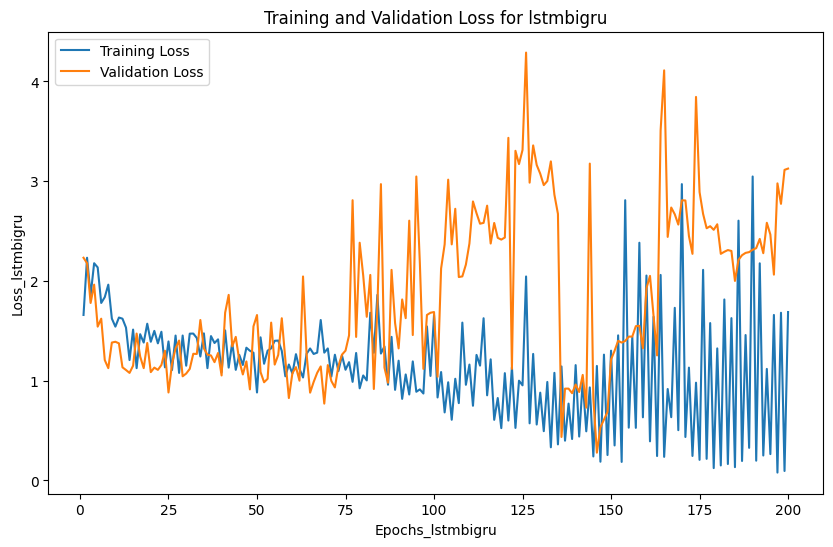

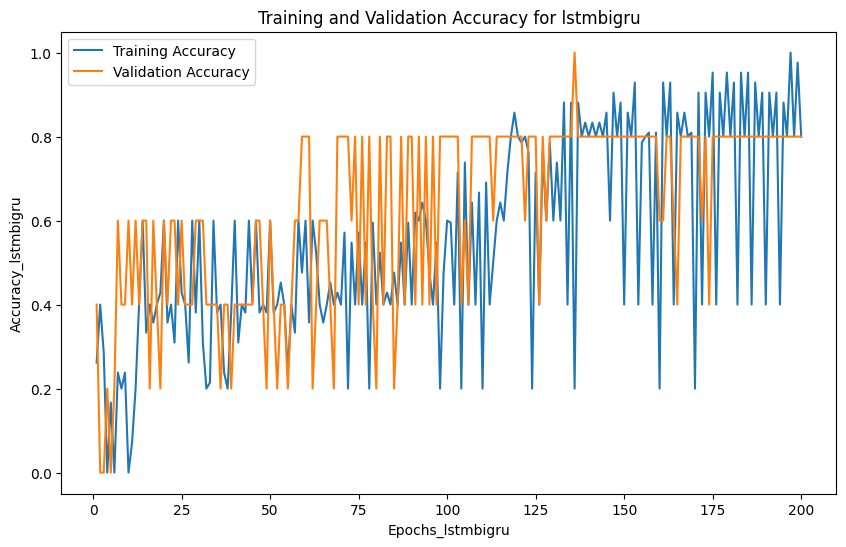

In [ ]:
epochs_lstmbigru = re.findall(r'Epoch (\d+)/\d+', lstmbigru)
loss_lstmbigru = re.findall(r'loss: ([\d.]+)', lstmbigru)[:200]
accuracy_lstmbigru = re.findall(r'accuracy: ([\d.]+)', lstmbigru)[:200]
val_loss_lstmbigru = re.findall(r'val_loss: ([\d.]+)', lstmbigru)[:200]
val_accuracy_lstmbigru = re.findall(r'val_accuracy: ([\d.]+)', lstmbigru)[:200]

# Convert extracted details to float
loss_lstmbigru = [float(val) for val in loss_lstmbigru]
accuracy_lstmbigru = [float(val) for val in accuracy_lstmbigru]
val_loss_lstmbigru = [float(val) for val in val_loss_lstmbigru]
val_accuracy_lstmbigru = [float(val) for val in val_accuracy_lstmbigru]

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss_lstmbigru, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss_lstmbigru, label='Validation Loss')
plt.title('Training and Validation Loss for lstmbigru')
plt.xlabel('Epochs_lstmbigru')
plt.ylabel('Loss_lstmbigru')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy_lstmbigru, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy_lstmbigru, label='Validation Accuracy')
plt.title('Training and Validation Accuracy for lstmbigru')
plt.xlabel('Epochs_lstmbigru')
plt.ylabel('Accuracy_lstmbigru')
plt.legend()
plt.show()

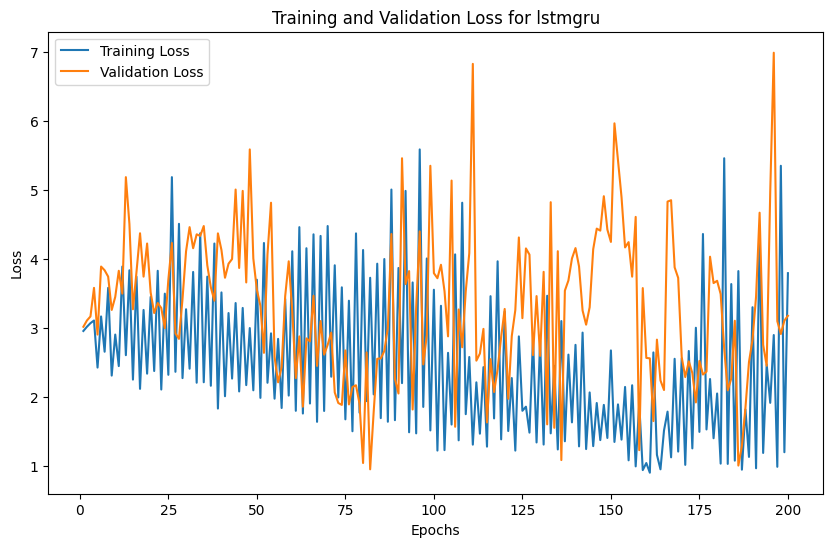

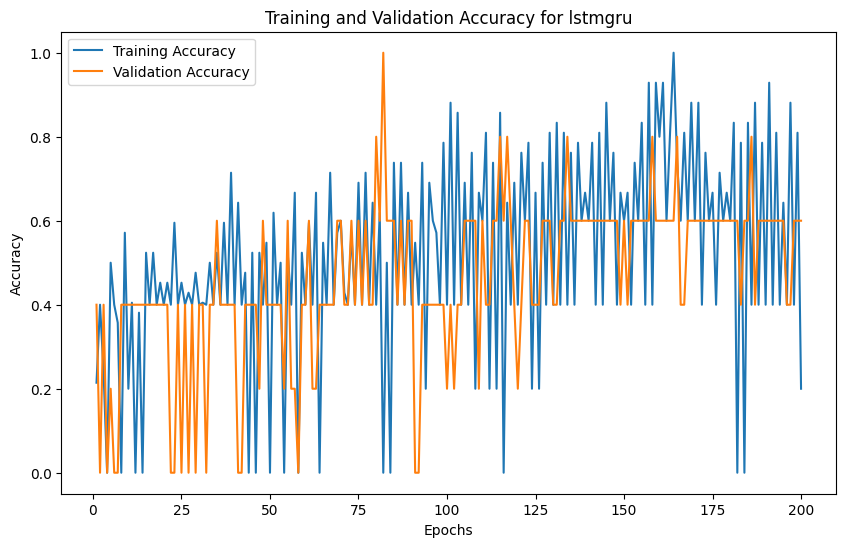

In [ ]:
epochs_lstmgru = re.findall(r'Epoch (\d+)/\d+', lstmgru)
loss_lstmgru = re.findall(r'loss: ([\d.]+)', lstmgru)[:200]
accuracy_lstmgru = re.findall(r'accuracy: ([\d.]+)', lstmgru)[:200]
val_loss_lstmgru = re.findall(r'val_loss: ([\d.]+)', lstmgru)[:200]
val_accuracy_lstmgru = re.findall(r'val_accuracy: ([\d.]+)', lstmgru)[:200]

# Convert extracted details to float
loss_lstmgru = [float(val) for val in loss_lstmgru]
accuracy_lstmgru = [float(val) for val in accuracy_lstmgru]
val_loss_lstmgru = [float(val) for val in val_loss_lstmgru]
val_accuracy_lstmgru = [float(val) for val in val_accuracy_lstmgru]

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_lstmgru) + 1), loss_lstmgru, label='Training Loss')
plt.plot(range(1, len(val_loss_lstmgru) + 1), val_loss_lstmgru, label='Validation Loss')
plt.title('Training and Validation Loss for lstmgru')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_lstmgru) + 1), accuracy_lstmgru, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_lstmgru) + 1), val_accuracy_lstmgru, label='Validation Accuracy')
plt.title('Training and Validation Accuracy for lstmgru')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


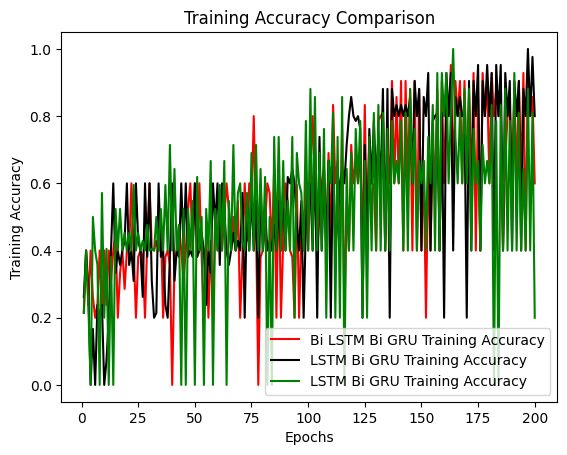

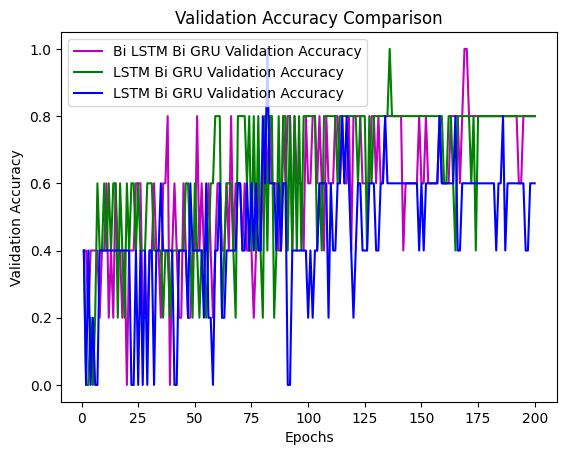

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have four arrays: model1_train_acc, model1_val_acc, model2_train_acc, model2_val_acc

epochs = range(1, len(accuracy) + 1)

# Plotting the training accuracy for both models
plt.plot(epochs, accuracy, 'r', label='Bi LSTM Bi GRU Training Accuracy')
plt.plot(epochs, accuracy_lstmbigru, 'black', label='LSTM Bi GRU Training Accuracy')
plt.plot(epochs, accuracy_lstmgru, 'g', label='LSTM Bi GRU Training Accuracy')

# Adding labels and title to the plot
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

# Displaying the plot
plt.show()


# Plotting the validation accuracy for both models
plt.plot(epochs, val_accuracy, 'm', label='Bi LSTM Bi GRU Validation Accuracy')
plt.plot(epochs, val_accuracy_lstmbigru, 'g', label='LSTM Bi GRU Validation Accuracy')
plt.plot(epochs, val_accuracy_lstmgru, 'b', label='LSTM Bi GRU Validation Accuracy')

# Adding labels and title to the plot
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
f1_lstmgru = 0.5
f1_bilstmbigru = 0.98
f1_lstmbigru = 0.667


In [ ]:
rmse_lstmgru = 2.972092416687835
rmse_bilstmbigru = 1.9578900207451218
rmse_lstmbigru = 2.1984843263788196

In [ ]:
accuracy_lstmgru = 0.5000
accuracy_bilstmbigru = 0.8333
accuracy_lstmbigru = 0.6667

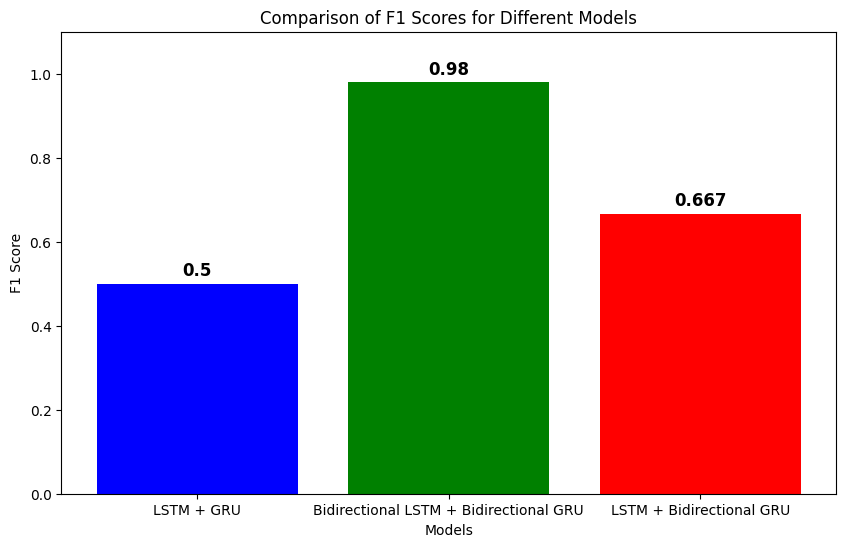

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# F1 scores for each model
f1_scores = [0.5, 0.98, 0.667]

# Model names
models = ['LSTM + GRU', 'Bidirectional LSTM + Bidirectional GRU', 'LSTM + Bidirectional GRU']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['b', 'g', 'r'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1.1)

# Annotate the bars with the values
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


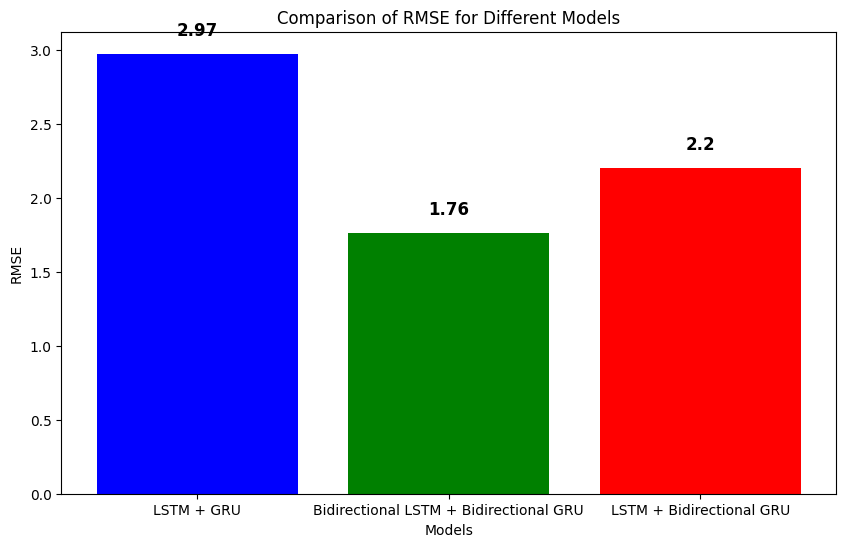

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# RMSE values for each model
rmse_values = [2.972092416687835, 1.7578900207451218, 2.1984843263788196]

# Model names
models = ['LSTM + GRU', 'Bidirectional LSTM + Bidirectional GRU', 'LSTM + Bidirectional GRU']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['b', 'g', 'r'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')

# Annotate the bars with the values
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


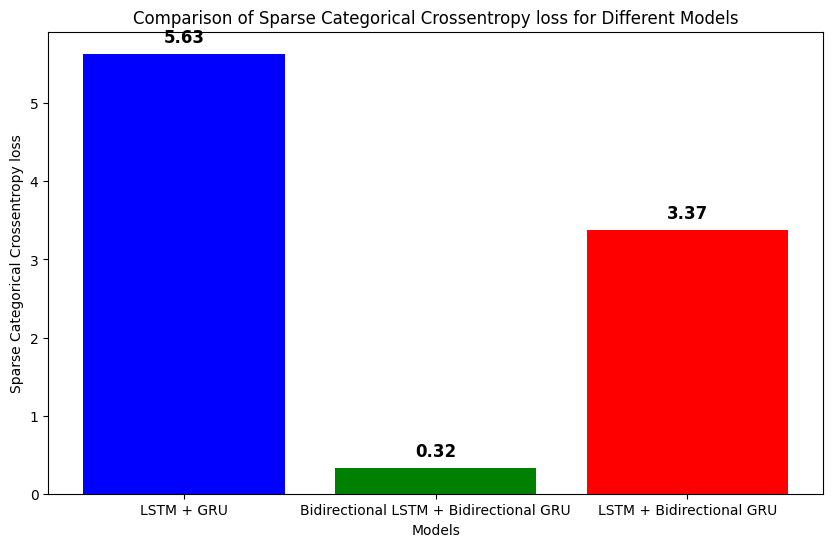

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# sparse_categorical_crossentropy values for each model
sparse_categorical_crossentropy_values = [5.6341, 0.3244, 3.3732]

# Model names
models = ['LSTM + GRU', 'Bidirectional LSTM + Bidirectional GRU', 'LSTM + Bidirectional GRU']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, sparse_categorical_crossentropy_values, color=['b', 'g', 'r'])
plt.xlabel('Models')
plt.ylabel('Sparse Categorical Crossentropy loss-')
plt.title('Comparison of Sparse Categorical Crossentropy loss for Different Models')

# Annotate the bars with the values
for i, v in enumerate(sparse_categorical_crossentropy_values):
    plt.text(i, v + 0.1, str(round(v, 2)), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


In [1]:

from tabulate import tabulate

# F1 scores, RMSE values, and accuracy for each model
f1_scores = [0.5, 0.98, 0.667]
rmse_values = [2.972092416687835, 1.9578900207451218, 2.1984843263788196]
accuracies = [0.5000, 0.8333, 0.6667]
sparse_categorical_crossentropy_values = [5.6341, 0.3244, 3.3732]

# Model names
models = ['LSTM + GRU', 'Bidirectional LSTM + Bidirectional GRU', 'LSTM + Bidirectional GRU']

# Create a list of lists containing the data for the table
table_data = []
for model, f1, rmse, acc, scc in zip(models, f1_scores, rmse_values, accuracies, sparse_categorical_crossentropy_values):
    table_data.append([model, f1, rmse, acc, scc])

# Print the table
headers = ['Model', 'F1 Score', 'RMSE', 'Accuracy', 'Sparse Categorical Crossentropy']
print(tabulate(table_data, headers=headers, tablefmt='grid'))


+----------------------------------------+------------+---------+------------+-----------------------------------+
| Model                                  |   F1 Score |    RMSE |   Accuracy |   Sparse Categorical Crossentropy |
+========================================+============+=========+============+===================================+
| LSTM + GRU                             |      0.5   | 2.97209 |     0.5    |                            5.6341 |
+----------------------------------------+------------+---------+------------+-----------------------------------+
| Bidirectional LSTM + Bidirectional GRU |      0.98  | 1.95789 |     0.8333 |                            0.3244 |
+----------------------------------------+------------+---------+------------+-----------------------------------+
| LSTM + Bidirectional GRU               |      0.667 | 2.19848 |     0.6667 |                            3.3732 |
+----------------------------------------+------------+---------+------------+--

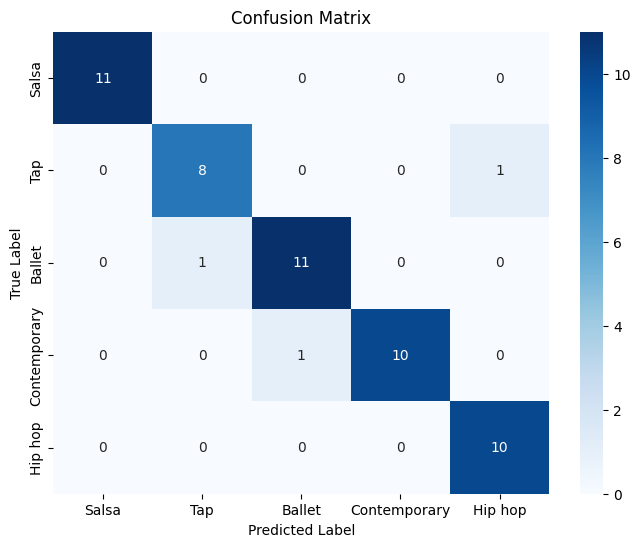

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Confusion matrix
confusion_matrix = np.array([[11, 0, 0, 0, 0],
                             [0, 8, 0, 0, 1],
                             [0, 1, 11, 0, 0],
                             [0, 0, 1, 10, 0],
                             [0, 0, 0, 0, 10]])

# Class labels
class_labels = ['Salsa', 'Tap', 'Ballet', 'Contemporary', 'Hip hop']

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix, index=class_labels, columns=class_labels)

# Plot the DataFrame as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
